# Sales and Profitability Analysis

### Contents:

- [Data Exploration and Preprocessing](#dataprep)
- [Exploratory Data Analysis](#eda)
- [ABC Product Segmentation and Analysis](#abc)

The original dataset is a year's worth of electronics sales transactions. It has around 185K records and 11 attributes. The dataset can be downloaded [here](https://www.kaggle.com/datasets/aemyjutt/salesdata/data).

Business Objective: Identify the products which generated 80% of profit.

<a id='dataprep'></a>
## Data Exploration and Preprocessing

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset

sales = pd.read_csv('../data/France_sales_data_185K_profit.csv')
sales.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


##### Observations:
- Column naming convention is not consistent
- Order ID must be string
- Product_ean (or product_code) must be string
- Order Date must be datetime

In [4]:
# change column names

col_mapping = {'Order Date': 'order_date',
                'Order ID': 'order_id',
                'Product': 'product',
                'Product_ean': 'product_code',
                'catégorie': 'category',
                'Purchase Address': 'address',
                'Quantity Ordered': 'quantity',
                'Price Each': 'price',
                'Cost price': 'cost',
                'turnover': 'sales',
                'margin': 'gross_profit'}

sales.columns = [col_mapping[col] if col in col_mapping else col for col in sales.columns]
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [5]:
# convert order_id and product_code to string

cols = ['order_id', 'product_code']
sales[cols] = sales[cols].astype('str')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_date    185950 non-null  object 
 1   order_id      185950 non-null  object 
 2   product       185950 non-null  object 
 3   product_code  185950 non-null  object 
 4   category      185950 non-null  object 
 5   address       185950 non-null  object 
 6   quantity      185950 non-null  int64  
 7   price         185950 non-null  float64
 8   cost          185950 non-null  float64
 9   sales         185950 non-null  float64
 10  gross_profit  185950 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 15.6+ MB


In [6]:
# remove trailing dots and zeros from product_code values

sales['product_code'] = sales['product_code'].str[:-2]
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [7]:
# convert order_date to datetime

sales['order_date'] = pd.to_datetime(sales['order_date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    185950 non-null  datetime64[ns]
 1   order_id      185950 non-null  object        
 2   product       185950 non-null  object        
 3   product_code  185950 non-null  object        
 4   category      185950 non-null  object        
 5   address       185950 non-null  object        
 6   quantity      185950 non-null  int64         
 7   price         185950 non-null  float64       
 8   cost          185950 non-null  float64       
 9   sales         185950 non-null  float64       
 10  gross_profit  185950 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 15.6+ MB


In [8]:
# create gross_margin column

sales['gross_margin'] = (round(sales['gross_profit'] / sales['sales'], 2))
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,gross_margin
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,0.67
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,0.50
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,0.50
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,0.35
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,0.50


In [9]:
sales['cost'].value_counts()

cost
5.9750      21903
7.4750      21658
1.4950      20641
1.9200      20577
5.9950      18882
97.5000     15549
49.9950     13325
97.4935      7507
231.0000     6842
198.0000     6837
128.6967     6230
125.3967     6181
99.0000      4800
561.0000     4724
329.9967     4128
71.4935      4101
132.0000     2065
Name: count, dtype: int64

In [10]:
# extract date, period, day, hour and create individual columns

sales['period'] = sales['order_date'].dt.to_period('M')
sales['dow'] = sales['order_date'].dt.day_name()
sales['hour'] = sales['order_date'].dt.strftime('%I %p')
sales['date'] = sales['order_date'].dt.date
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,gross_margin,period,dow,hour,date
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,0.67,2019-01,Tuesday,09 PM,2019-01-22
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,0.50,2019-01,Monday,02 PM,2019-01-28
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,0.50,2019-01,Thursday,01 PM,2019-01-17
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,0.35,2019-01,Saturday,08 PM,2019-01-05
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,0.50,2019-01,Friday,11 AM,2019-01-25


In [11]:
sales['category'].value_counts()

category
Sports          46925
Vêtements       46405
Alimentation    46342
Électronique    46278
Name: count, dtype: int64

In [12]:
sales['product'].value_counts()

product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [13]:
sales[sales['category'] == 'Sports']['product']

3                 27in FHD Monitor
18            USB-C Charging Cable
23        Apple Airpods Headphones
24           AA Batteries (4-pack)
27            USB-C Charging Cable
                    ...           
185917        USB-C Charging Cable
185919    Apple Airpods Headphones
185926       AA Batteries (4-pack)
185937      AAA Batteries (4-pack)
185939    Apple Airpods Headphones
Name: product, Length: 46925, dtype: object

In [14]:
sales[sales['category'] == 'Vêtements']['product']

0                             iPhone
2                   Wired Headphones
6             27in 4K Gaming Monitor
7               USB-C Charging Cable
10          Apple Airpods Headphones
                     ...            
185914    Bose SoundSport Headphones
185930      Lightning Charging Cable
185938      Lightning Charging Cable
185940        AAA Batteries (4-pack)
185941    Bose SoundSport Headphones
Name: product, Length: 46405, dtype: object

In [15]:
sales[sales['category'] == 'Électronique']['product']

4                   Wired Headphones
8         Bose SoundSport Headphones
9           Apple Airpods Headphones
14                     Flatscreen TV
20            AAA Batteries (4-pack)
                     ...            
185935      Apple Airpods Headphones
185943               ThinkPad Laptop
185945      Lightning Charging Cable
185946         AA Batteries (4-pack)
185949    Bose SoundSport Headphones
Name: product, Length: 46278, dtype: object

In [16]:
sales[sales['category'] == 'Alimentation']['product']

1         Lightning Charging Cable
5           AAA Batteries (4-pack)
15                27in FHD Monitor
16                 Vareebadd Phone
17        Apple Airpods Headphones
                    ...           
185936                    LG Dryer
185942               Flatscreen TV
185944                      iPhone
185947             Vareebadd Phone
185948            Wired Headphones
Name: product, Length: 46342, dtype: object

##### It shows that the products were not properly categorized. Vêtements means clothing and Alimentation means food.

In [17]:
# create a function to revise category values

def change_cat(df):
    """ pass a dataframe and return category values based on product"""
    if df['product'] in ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)']:
        return 'batteries'
    elif df['product'] in ['USB-C Charging Cable', 'Lightning Charging Cable']:
        return 'charging cables'
    elif df['product'] in ['LG Dryer', 'LG Washing Machine']:
        return 'appliance'
    elif df['product'] in ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones']:
        return 'headphones'
    elif df['product'] in ['Macbook Pro Laptop', 'ThinkPad Laptop']:
        return 'laptops'
    elif df['product'] in ['iPhone', 'Google Phone', 'Vareebadd Phone']:
        return 'smartphones'
    elif df['product'] in ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor','20in Monitor']:
        return 'monitors'
    elif df['product'] in ['Flatscreen TV']:
        return 'smartTV'
    else:
        return 'others'

In [18]:
# apply function to the dataframe

sales['category'] = sales.apply(change_cat, axis =1)
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,gross_margin,period,dow,hour,date
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,smartphones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,0.67,2019-01,Tuesday,09 PM,2019-01-22
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,charging cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,0.50,2019-01,Monday,02 PM,2019-01-28
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,0.50,2019-01,Thursday,01 PM,2019-01-17
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,monitors,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,0.35,2019-01,Saturday,08 PM,2019-01-05
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,0.50,2019-01,Friday,11 AM,2019-01-25


In [19]:
sales['category'].value_counts()

category
headphones         47756
charging cables    43561
batteries          41218
monitors           24019
smartphones        14432
laptops             8852
smartTV             4800
appliance           1312
Name: count, dtype: int64

In [20]:
# extract city from address

sales['city'] = sales['address'].str.split(',').str[1].str.strip()
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,gross_margin,period,dow,hour,date,city
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,smartphones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,0.67,2019-01,Tuesday,09 PM,2019-01-22,Boston
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,charging cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,0.50,2019-01,Monday,02 PM,2019-01-28,Portland
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,0.50,2019-01,Thursday,01 PM,2019-01-17,San Francisco
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,monitors,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,0.35,2019-01,Saturday,08 PM,2019-01-05,Los Angeles
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,0.50,2019-01,Friday,11 AM,2019-01-25,Austin


In [21]:
sales['city'].value_counts()

city
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: count, dtype: int64

In [22]:
# extract state from address

sales['state'] = sales['address'].str.split(',').str[2].str[:3].str.strip()
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,gross_margin,period,dow,hour,date,city,state
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,smartphones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,0.67,2019-01,Tuesday,09 PM,2019-01-22,Boston,MA
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,charging cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,0.50,2019-01,Monday,02 PM,2019-01-28,Portland,OR
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,0.50,2019-01,Thursday,01 PM,2019-01-17,San Francisco,CA
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,monitors,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,0.35,2019-01,Saturday,08 PM,2019-01-05,Los Angeles,CA
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,0.50,2019-01,Friday,11 AM,2019-01-25,Austin,TX


In [23]:
sales['state'].value_counts()

state
CA    74337
NY    24876
TX    24725
MA    19934
GA    14881
WA    14732
OR    10010
ME     2455
Name: count, dtype: int64

In [24]:
sales.head()

,order_date,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,gross_margin,period,dow,hour,date,city,state
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,smartphones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,0.67,2019-01,Tuesday,09 PM,2019-01-22,Boston,MA
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,charging cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,0.50,2019-01,Monday,02 PM,2019-01-28,Portland,OR
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,0.50,2019-01,Thursday,01 PM,2019-01-17,San Francisco,CA
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,monitors,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,0.35,2019-01,Saturday,08 PM,2019-01-05,Los Angeles,CA
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,0.50,2019-01,Friday,11 AM,2019-01-25,Austin,TX


In [25]:
# delete address column

sales.drop(['address'], axis = 1, inplace = True)

In [26]:
sales.head()

,order_date,order_id,product,product_code,category,quantity,price,cost,sales,gross_profit,gross_margin,period,dow,hour,date,city,state
0,2019-01-22 21:25:00,141234,iPhone,5638008983335,smartphones,1,700.00,231.0000,700.00,469.0000,0.67,2019-01,Tuesday,09 PM,2019-01-22,Boston,MA
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5563319511488,charging cables,1,14.95,7.4750,14.95,7.4750,0.50,2019-01,Monday,02 PM,2019-01-28,Portland,OR
2,2019-01-17 13:33:00,141236,Wired Headphones,2113973395220,headphones,2,11.99,5.9950,23.98,11.9900,0.50,2019-01,Thursday,01 PM,2019-01-17,San Francisco,CA
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3069156759167,monitors,1,149.99,97.4935,149.99,52.4965,0.35,2019-01,Saturday,08 PM,2019-01-05,Los Angeles,CA
4,2019-01-25 11:59:00,141238,Wired Headphones,9692680938163,headphones,1,11.99,5.9950,11.99,5.9950,0.50,2019-01,Friday,11 AM,2019-01-25,Austin,TX


In [27]:
sales.describe(include = 'object')

,order_id,product,product_code,category,dow,hour,date,city,state
count,185950,185950,185950,185950,185950,185950,185950,185950,185950
unique,178437,19,185950,8,7,24,366,9,8
top,160873,USB-C Charging Cable,5638008983335,headphones,Tuesday,07 PM,2019-12-17,San Francisco,CA
freq,5,21903,1,47756,27175,12905,881,44732,74337


In [28]:
sales.describe()

,order_date,quantity,price,cost,sales,gross_profit,gross_margin
count,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,2019-07-18 21:54:38.887550208,1.124383,184.399735,69.668583,185.490917,115.289422,0.516314
min,2019-01-01 03:07:00,1.000000,2.990000,1.495000,2.990000,1.495000,0.350000
25%,2019-04-16 21:05:15,1.000000,11.950000,5.975000,11.950000,5.975000,0.500000
50%,2019-07-17 20:40:30,1.000000,14.950000,7.475000,14.950000,7.475000,0.500000
75%,2019-10-26 08:14:00,1.000000,150.000000,97.500000,150.000000,52.500000,0.500000
max,2020-01-01 05:13:00,9.000000,1700.000000,561.000000,3400.000000,2278.000000,0.670000
std,NaN,0.442793,332.731330,109.424191,332.919771,225.227190,0.097557


##### The transactions covers the period between 2019-01-01 and 2020-01-01.

In [29]:
# check the transactions per period

sales.groupby('period').agg({
                        'sales': 'sum',
                        'gross_profit': 'sum'})

,sales,gross_profit
period,,
2019-01,1813586.44,1.127681e+06
2019-02,2202022.42,1.369115e+06
2019-03,2807100.38,1.741473e+06
2019-04,3390670.24,2.109617e+06
2019-05,3152606.75,1.965322e+06
2019-06,2577802.26,1.602693e+06
2019-07,2647775.76,1.642685e+06
2019-08,2244467.88,1.396144e+06
2019-09,2097560.13,1.300184e+06


In [30]:
# supress scientific notation on gross_profit column

sales['gross_profit'] = sales['gross_profit'].round(2)

In [31]:
# Check sales and profit per period

sales.groupby('period').agg({
                        'sales': 'sum',
                        'gross_profit': 'sum'})

,sales,gross_profit
period,,
2019-01,1813586.44,1127702.35
2019-02,2202022.42,1369141.42
2019-03,2807100.38,1741507.10
2019-04,3390670.24,2109657.95
2019-05,3152606.75,1965358.72
2019-06,2577802.26,1602722.19
2019-07,2647775.76,1642717.23
2019-08,2244467.88,1396169.85
2019-09,2097560.13,1300209.80


In [32]:
# Check how many records in 2020

sales[sales['period'] == '2020-01'].shape[0]

34

#### January 2020 has only 34 transactions. For ths purpose of further analysis, the records for 2020 will be removed.

In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    185950 non-null  datetime64[ns]
 1   order_id      185950 non-null  object        
 2   product       185950 non-null  object        
 3   product_code  185950 non-null  object        
 4   category      185950 non-null  object        
 5   quantity      185950 non-null  int64         
 6   price         185950 non-null  float64       
 7   cost          185950 non-null  float64       
 8   sales         185950 non-null  float64       
 9   gross_profit  185950 non-null  float64       
 10  gross_margin  185950 non-null  float64       
 11  period        185950 non-null  period[M]     
 12  dow           185950 non-null  object        
 13  hour          185950 non-null  object        
 14  date          185950 non-null  object        
 15  city          185

In [34]:
# Delete records where year is 2020

sales = sales[sales['order_date'].dt.year != 2020]
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185916 entries, 0 to 185949
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    185916 non-null  datetime64[ns]
 1   order_id      185916 non-null  object        
 2   product       185916 non-null  object        
 3   product_code  185916 non-null  object        
 4   category      185916 non-null  object        
 5   quantity      185916 non-null  int64         
 6   price         185916 non-null  float64       
 7   cost          185916 non-null  float64       
 8   sales         185916 non-null  float64       
 9   gross_profit  185916 non-null  float64       
 10  gross_margin  185916 non-null  float64       
 11  period        185916 non-null  period[M]     
 12  dow           185916 non-null  object        
 13  hour          185916 non-null  object        
 14  date          185916 non-null  object        
 15  city          185916 n

In [35]:
# Check for missing values

sales.isnull().sum()

order_date      0
order_id        0
product         0
product_code    0
category        0
quantity        0
price           0
cost            0
sales           0
gross_profit    0
gross_margin    0
period          0
dow             0
hour            0
date            0
city            0
state           0
dtype: int64

In [36]:
# Check for duplicate records

sales.duplicated().sum()

0

In [37]:
# load the preprocessed dataframe to .pkl and csv files in local folder

sales.to_pickle('../data/sales_data.pkl')
sales.to_csv('../data/sales_data.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### 1. 2019 Sales Performance 
        a. Total Sales
        b. Total Profit
        c. Gross Margin
        c. Total Number of Orders

In [38]:
total_sales = sales['sales'].sum()
total_profit = sales['gross_profit'].sum()
num_orders = sales['order_id'].nunique()

print(f'Total sales or GMV for 2019 is: ${total_sales/1000000: .2f} M')
print(f'Total profit for 2019 is: ${total_profit/1000000: .2f} M')
print(f'Gross Margin for 2019: {(total_profit/total_sales) * 100: .2f} %')
print(f'Total number of orders for 2019 is: {num_orders:}')

Total sales or GMV for 2019 is: $ 34.48 M
Total profit for 2019 is: $ 21.43 M
Gross Margin for 2019:  62.16 %
Total number of orders for 2019 is: 178406


- Assuming the total sales is the net sales (net of discounts and returns), a profit margin of 62.16 % is a good indication that the seller retains a good amount of money after incurring cost of sales. These remaining funds will then be channeled toward other expenses such administrative, marketing, interests, and taxes.

### 2. What are the highest- performing products?
    a. Based on profit
    b. based on sales
    c. based on quantity sold

In [39]:
# What are the top 5 highest-performing products based on profit?

top5_prod_profit = sales.groupby(['product'])['gross_profit'].sum().sort_values(ascending=False)[:5]
top5_prod_profit

product
Macbook Pro Laptop        5384053.00
iPhone                    3211243.00
ThinkPad Laptop           2765718.74
Google Phone              2223462.00
27in 4K Gaming Monitor    1631233.61
Name: gross_profit, dtype: float64

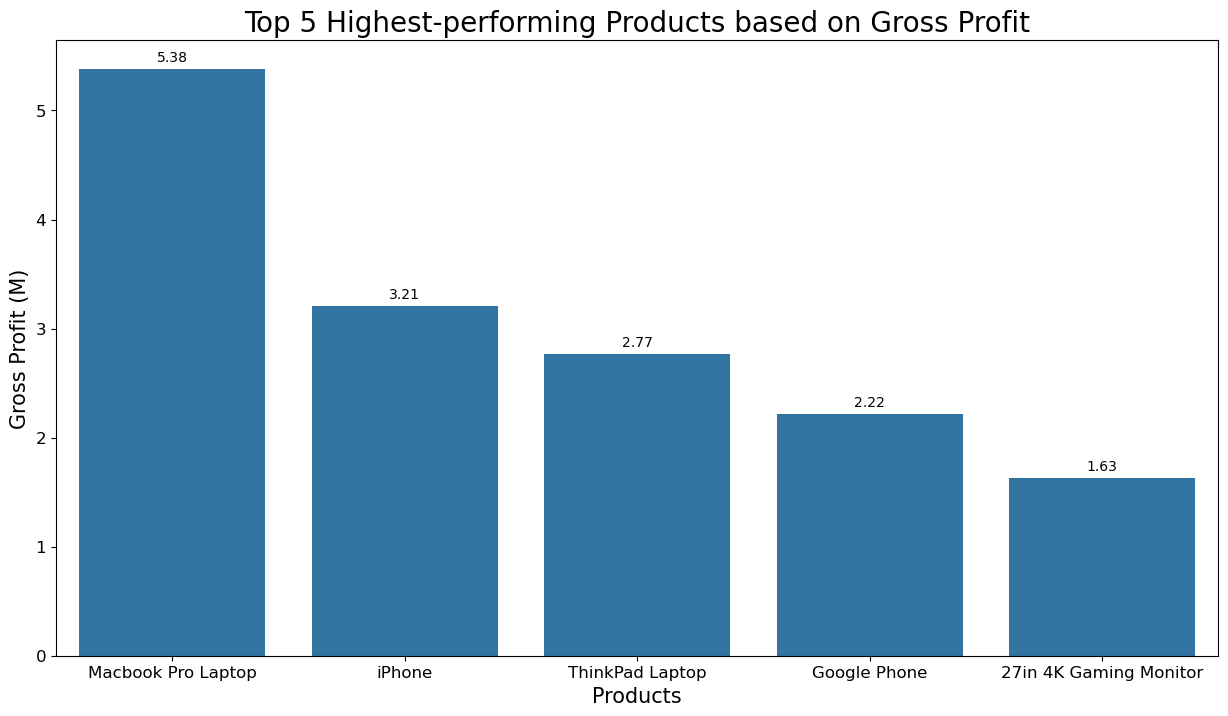

In [40]:
# Visualize the top 5 highest-performing products based on profit

top5_prod_profit = (sales.groupby(['product'])['gross_profit'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_profit.index, y = top5_prod_profit.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Products based on Gross Profit', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Gross Profit (M)', size = 15)
plt.show;

In [41]:
# What are the top 5 highest-performing products based on total sales?

top5_prod_sales = sales.groupby(['product'])['sales'].sum().sort_values(ascending=False)[:5]
top5_prod_sales

product
Macbook Pro Laptop        8035900.00
iPhone                    4792900.00
ThinkPad Laptop           4127958.72
Google Phone              3318600.00
27in 4K Gaming Monitor    2434707.57
Name: sales, dtype: float64

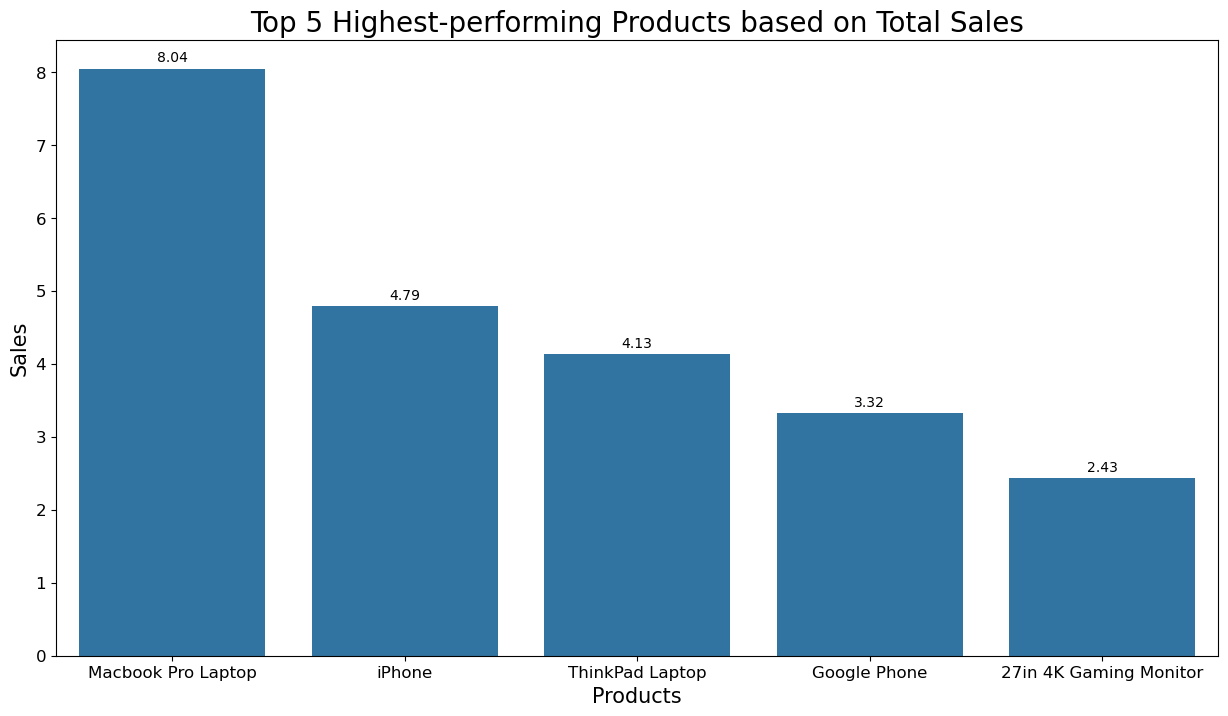

In [42]:
# Visualize top 5 highest-performing products based on total sales

top5_prod_sales = (sales.groupby(['product'])['sales'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_sales.index, y = top5_prod_sales.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3) 

plt.title('Top 5 Highest-performing Products based on Total Sales', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Sales', size = 15)
plt.show;

In [43]:
# What are the top 5 highest-performing products based on quantity sold?

top5_prod_qty = sales.groupby(['product'])['quantity'].sum().sort_values(ascending=False)[:5]
top5_prod_qty

product
AAA Batteries (4-pack)      31012
AA Batteries (4-pack)       27635
USB-C Charging Cable        23971
Lightning Charging Cable    23211
Wired Headphones            20553
Name: quantity, dtype: int64

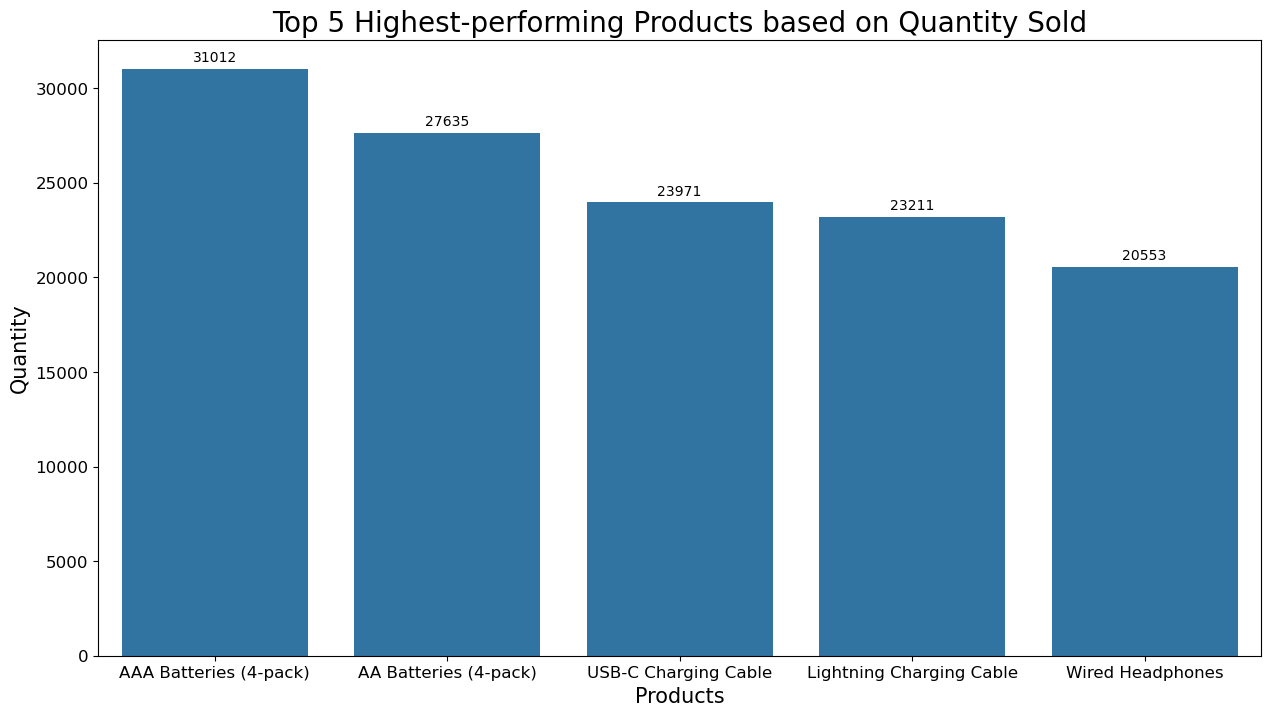

In [44]:
# Visualize the top 5 most popular products based on quantity sold?

top5_prod_qty = sales.groupby(['product'])['quantity'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_qty.index, y = top5_prod_qty.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Products based on Quantity Sold', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Quantity', size = 15)
plt.show;

- Based on sales and gross profit, the higest-performing product is **Macbook Pro laptop**. It generated sales of ``$8.04M`` and profit of ``$5.38M``. While **AAA Batteries (4-pack)** has the most number of units sold at ``31,012`` units.
- This indicates that Macbook Pro Laptop has higher selling price and higher profit margin.

### 3. Macbook Pro Laptop Performance Over Time

In [45]:
# Macbook Pro Laptop monthly sales

macbook_sales = sales[sales['product'] == 'Macbook Pro Laptop'].groupby(['period'])['sales'].sum().reset_index()
macbook_sales

,period,sales
0,2019-01,397800.0
1,2019-02,469200.0
2,2019-03,644300.0
3,2019-04,771800.0
4,2019-05,790500.0
5,2019-06,605200.0
6,2019-07,625600.0
7,2019-08,508300.0
8,2019-09,489600.0
9,2019-10,892500.0


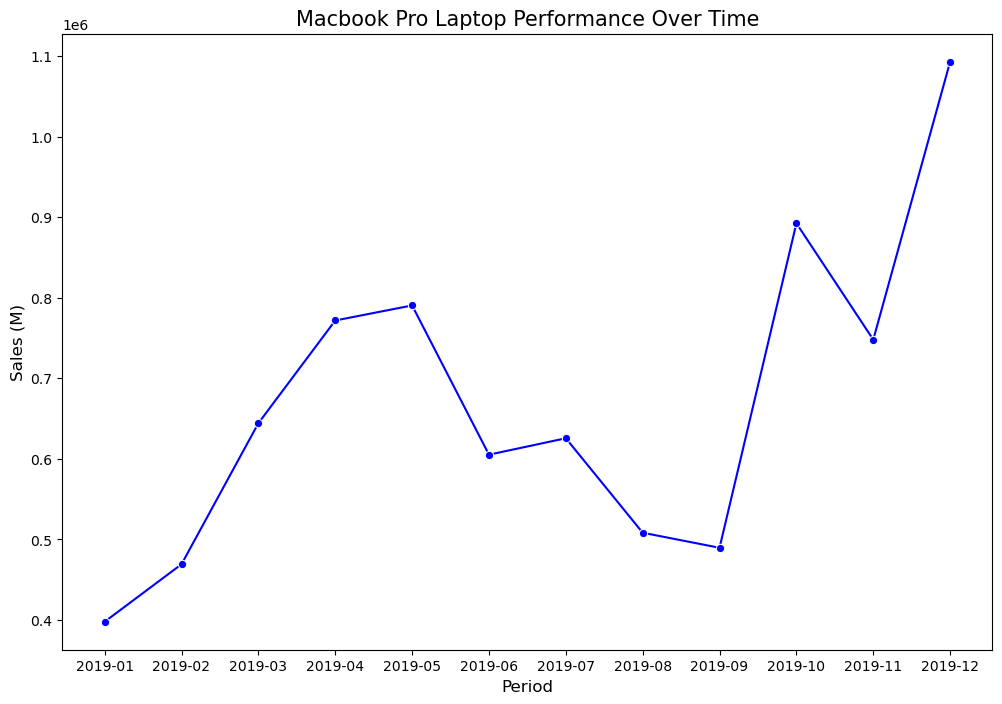

In [46]:
# Visualize Macbook Pro Laptop Performance Over Time

macbook_sales = sales[sales['product'] == 'Macbook Pro Laptop'].groupby(['period'])['sales'].sum().reset_index()

plt.figure(figsize = [12, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=macbook_sales, x = macbook_sales['period'].astype(str), y = 'sales', color = 'blue', marker = 'o')

plt.title('Macbook Pro Laptop Performance Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Sales (M)', size = 12)
plt.show()

- For 2019, Macbook Pro Laptop has higher sales during the months of April, May, and October to December. If this pattern remained the same in the past 3 or more years, the seller may need to consider stocking up more inventory during those months.

### 4. What are the higest-performing categories?
    a. Based on profit
    b. based on sales
    c. based on quantity sold

In [47]:
# What are the top 5 highest-performing categories based on profit?

top5_cat_profit = sales.groupby(['category'])['gross_profit'].sum().sort_values(ascending=False)[:5]
top5_cat_profit

category
laptops        8149771.74
smartphones    5988661.00
monitors       3764505.00
headphones     1617992.60
smartTV         968418.00
Name: gross_profit, dtype: float64

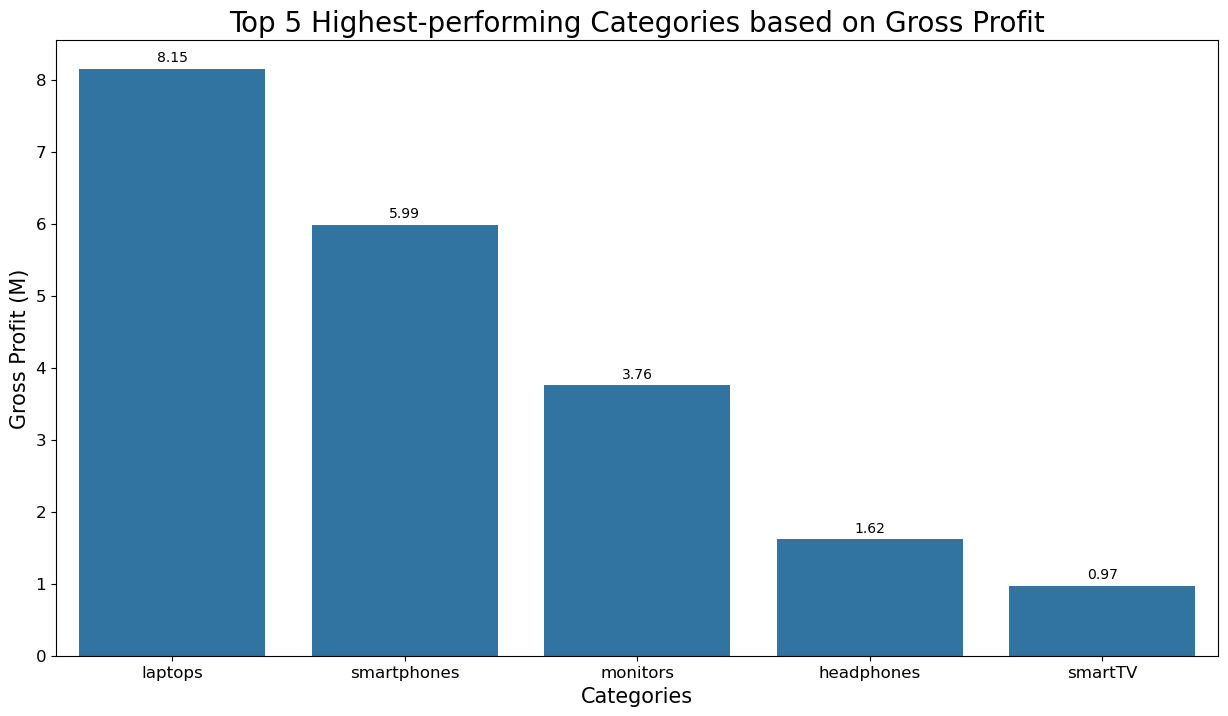

In [48]:
# Visualize the top 5 highest-performing categories based on profit

top5_cat_profit = (sales.groupby(['category'])['gross_profit'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_cat_profit.index, y = top5_cat_profit.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Categories based on Gross Profit', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Gross Profit (M)', size = 15)
plt.show;

In [49]:
# What are the top 5 highest-performing categories based on sales?

top5_cat_sales = sales.groupby(['category'])['sales'].sum().sort_values(ascending=False)[:5]
top5_cat_sales

category
laptops        12163858.72
smartphones     8938300.00
monitors        6376058.85
headphones      3940245.93
smartTV         1445400.00
Name: sales, dtype: float64

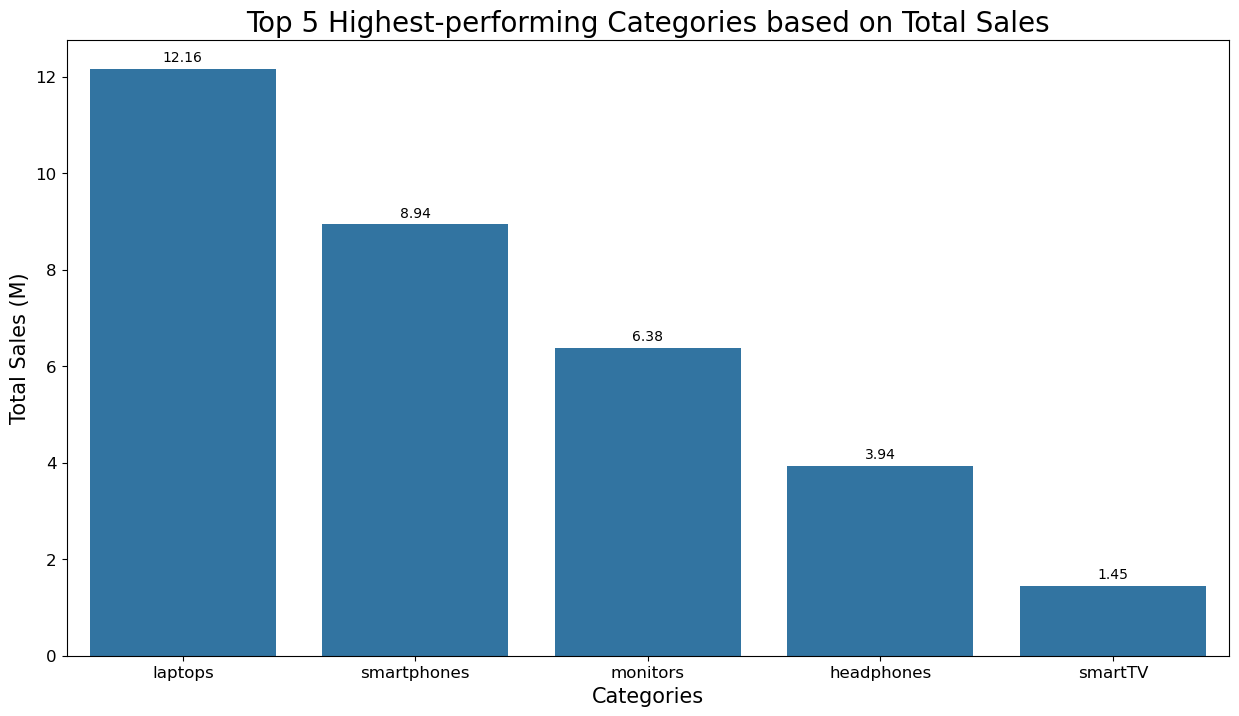

In [50]:
# Visualize the top 5 highest-performing categories based on sales

top5_cat_sales = (sales.groupby(['category'])['sales'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_cat_sales.index, y = top5_cat_sales.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Categories based on Total Sales', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Total Sales (M)', size = 15)
plt.show;

In [51]:
# What are the top 5 highest-performing categories based on quantity sold?

top5_cat_qty = sales.groupby(['category'])['quantity'].sum().sort_values(ascending=False)[:5]
top5_cat_qty

category
batteries          58647
headphones         49664
charging cables    47182
monitors           24115
smartphones        14445
Name: quantity, dtype: int64

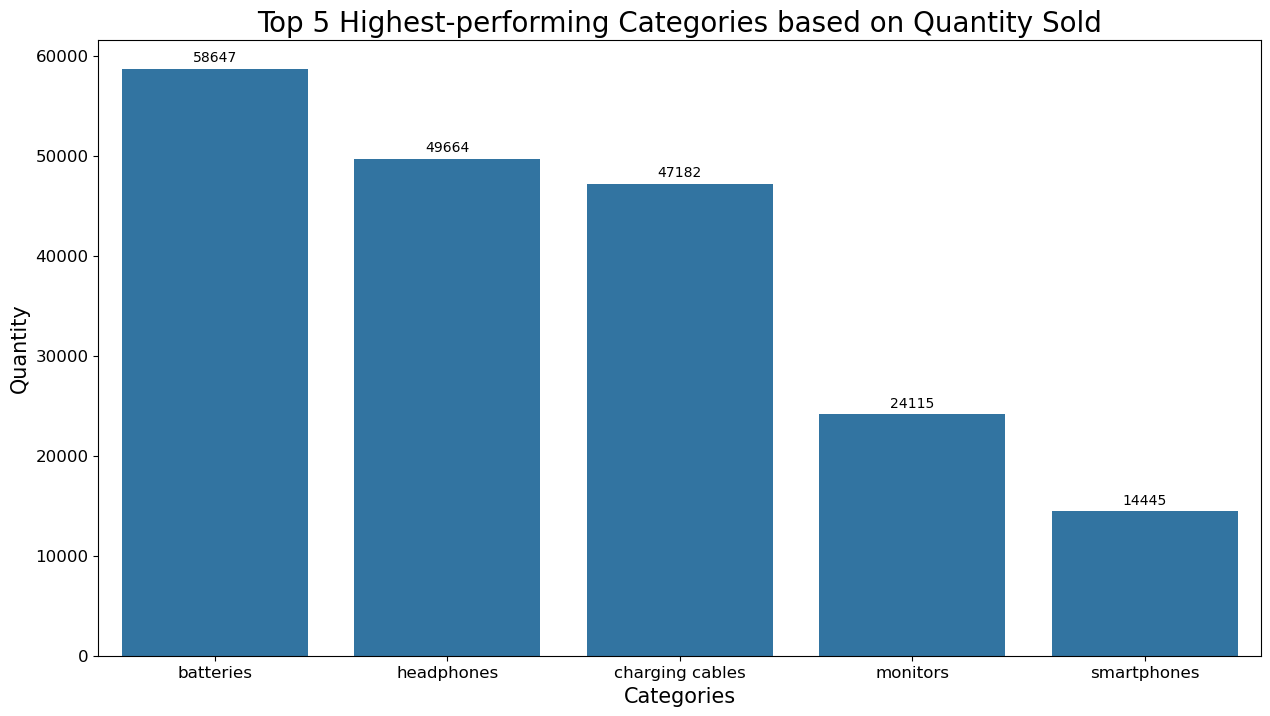

In [52]:
# Visualize the top 5 most popular categories based on quantity sold?

top5_cat_qty = sales.groupby(['category'])['quantity'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_cat_qty.index, y = top5_cat_qty.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Categories based on Quantity Sold', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Quantity', size = 15)
plt.show;

- Based on sales and gross profit, the highest-performing category is **laptops** as it generated sales of ``$12.16M`` and profit of ``$8.15M``. While **batteries** has the most number of units sold at ``58,647`` units. 
- This indicates that product in the **laptops** category have higher selling price and higher profit margin.

### 5. Laptops Category Performance Over Time

In [53]:
# Laptops category monthly sales

laptop_sales = sales[sales['category'] == 'laptops'].groupby(['period'])['sales'].sum().reset_index()
laptop_sales

,period,sales
0,2019-01,614797.83
1,2019-02,744197.25
2,2019-03,989296.55
3,2019-04,1161796.10
4,2019-05,1161496.29
5,2019-06,919196.86
6,2019-07,944596.81
7,2019-08,782297.26
8,2019-09,738597.51
9,2019-10,1353495.39


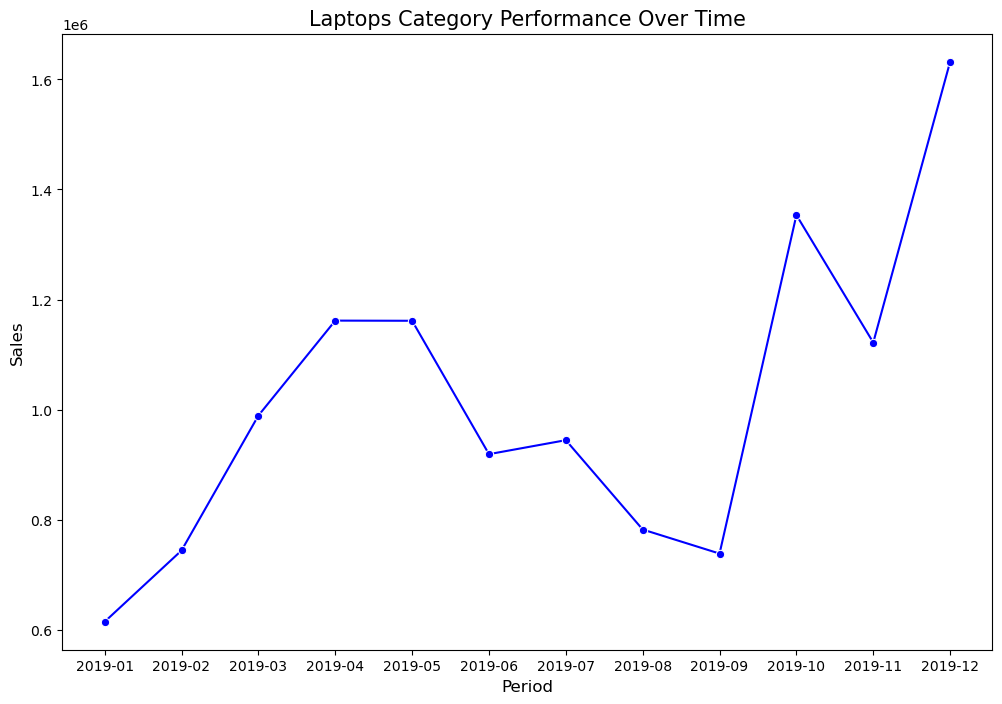

In [54]:
# Visualize Laptops Category Performance Over Time

plt.figure(figsize = [12, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=laptop_sales, x = laptop_sales['period'].astype(str), y = 'sales', color = 'blue', marker = 'o')

plt.title('Laptops Category Performance Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Sales', size = 12)
plt.show()

- For 2019, products in the laptops category have higher sales during the months of April, May, and October to December. If this pattern remained the same in the past 3 or more years, the seller may need to consider stocking up more inventory during those months.

### 6 Sales Performance and Gross Profit Over Time

In [55]:
# Monthly sales and profit

monthly_perf = sales.groupby(['period']).agg({
                                                'sales': 'sum',
                                                'gross_profit': 'sum'}).reset_index()
monthly_perf

,period,sales,gross_profit
0,2019-01,1813586.44,1127702.35
1,2019-02,2202022.42,1369141.42
2,2019-03,2807100.38,1741507.10
3,2019-04,3390670.24,2109657.95
4,2019-05,3152606.75,1965358.72
5,2019-06,2577802.26,1602722.19
6,2019-07,2647775.76,1642717.23
7,2019-08,2244467.88,1396169.85
8,2019-09,2097560.13,1300209.80
9,2019-10,3736726.88,2325258.81


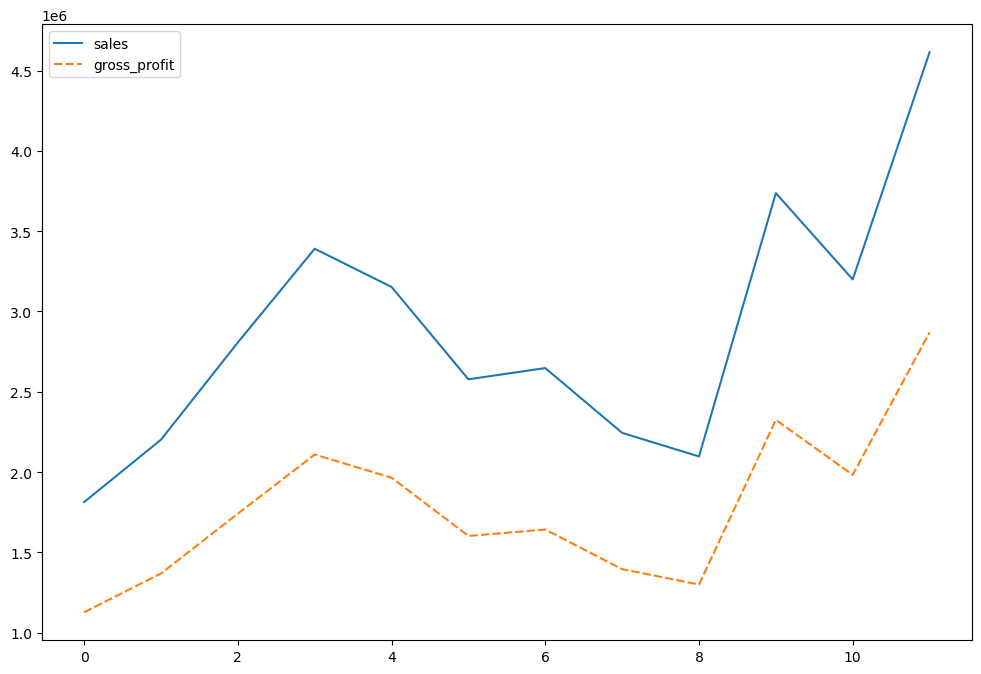

In [56]:
plt.figure(figsize = [12, 8])
ax = sns.lineplot(data = monthly_perf)

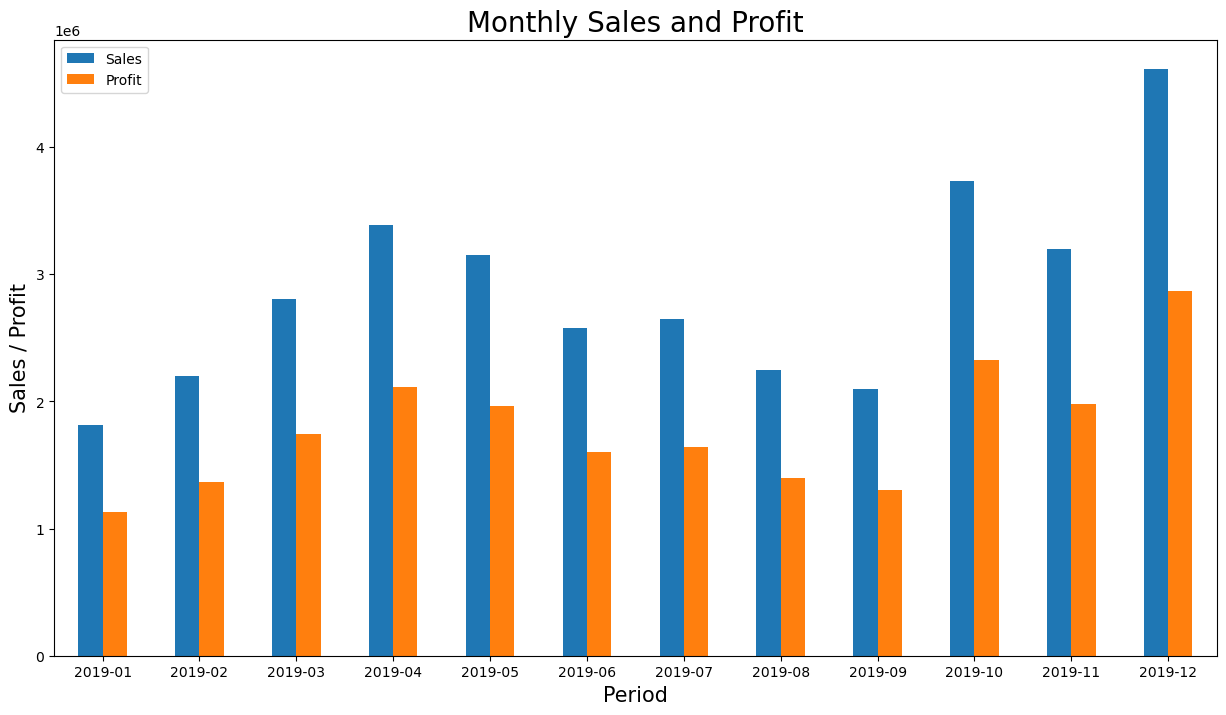

In [57]:
# Visualize monthly sales vs monthly profit (stacked bar)

monthly_perf.plot(kind='bar', x = 'period', figsize = (15, 8))
plt.title('Monthly Sales and Profit', fontsize = 20)
plt.xlabel('Period', fontsize = 15)
plt.ylabel('Sales / Profit', fontsize = 15)
plt.legend(["Sales", "Profit"])
plt.rcParams["axes.formatter.limits"] = (0, 4000000)
plt.xticks(rotation = 360)
plt.show()

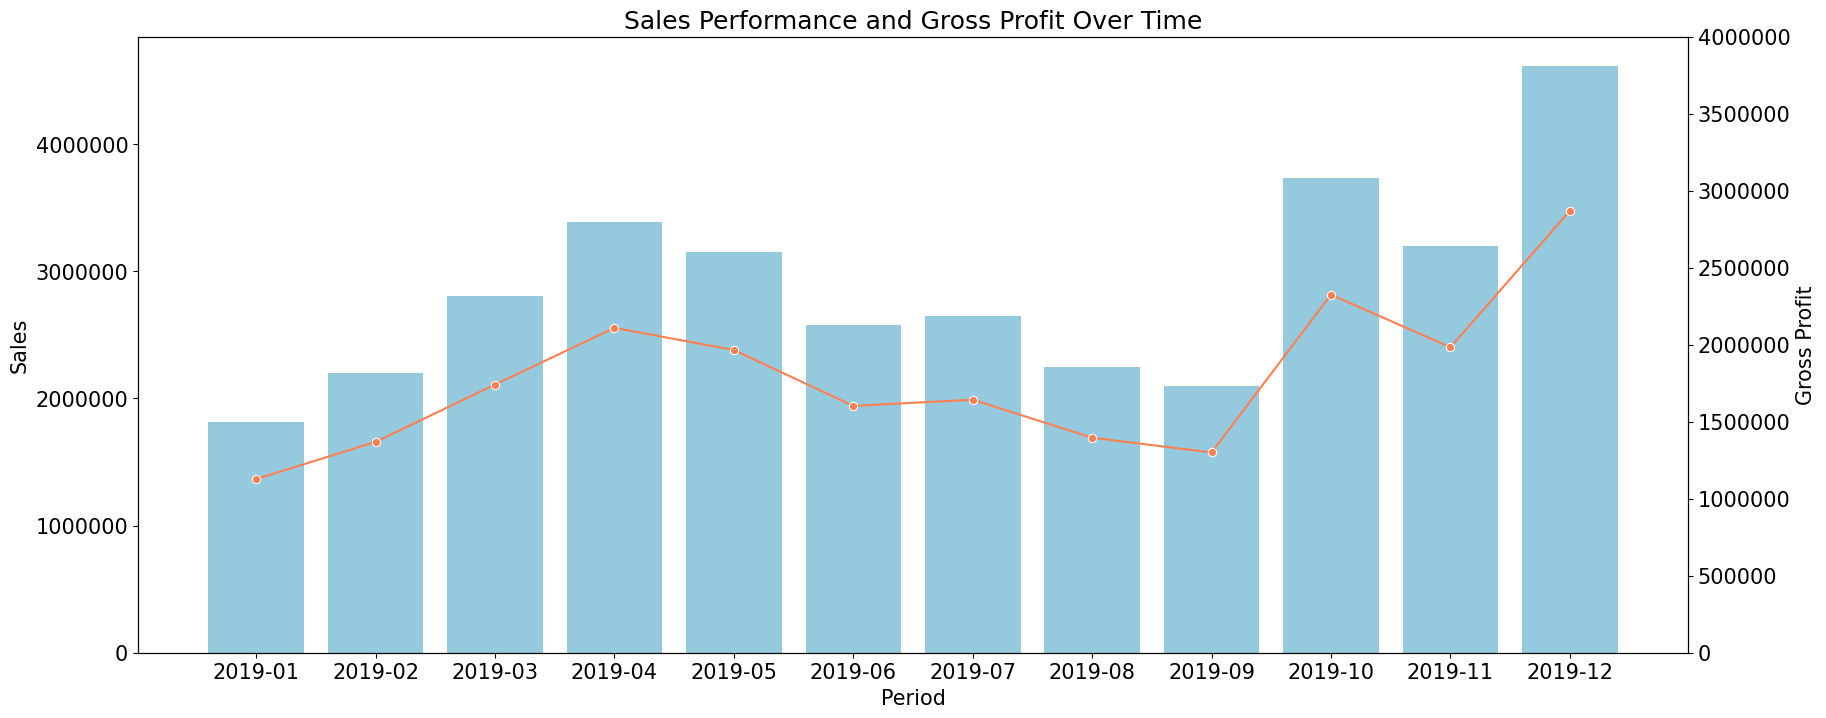

In [58]:
# Visualize monthly sales vs monthly profit (barplot & lineplot with dual y axis)

# convert period to datetime as seaborn and matplotlib don't support period datatype
monthly_perf['period'] = monthly_perf['period'].astype(str)

fig, ax1 = plt.subplots(figsize=[20, 8])
sns.barplot(x='period', y='sales', data=monthly_perf, ax=ax1, color='skyblue')
ax1.set_xlabel('Period', fontsize = 15)
ax1.set_ylabel('Sales', fontsize = 15)
ax1.ticklabel_format(style='plain', axis="y")
ax1.tick_params(axis = 'both', labelsize = 15)


ax2 = ax1.twinx()
sns.lineplot(x='period', y='gross_profit', data=monthly_perf, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('Gross Profit', fontsize = 15)
ax2.ticklabel_format(style='plain', axis="y")
ax2.tick_params(axis = 'both', labelsize = 15)
ax2.set_ylim(0, 4000000)
plt.title('Sales Performance and Gross Profit Over Time', fontsize = 18)

plt.show()

- The lineplot, grouped bar chart and combined barplot and lineplot clearly show that the sales and profit have a perfect positive relationship.

### 8. Statistical relationships between quantity, price, cost, sales, pross_profit, gross_margin, and hour

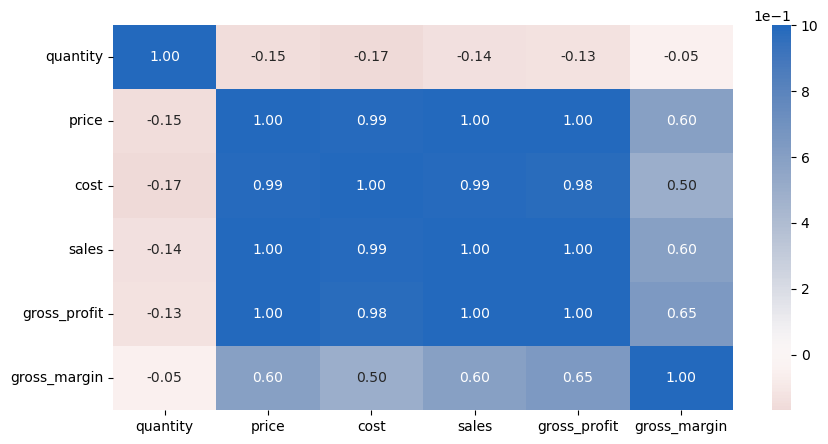

In [59]:
# create a correlation plot between numerical variables
num_var = sales.select_dtypes(include=['int','float']).columns.tolist()

plt.figure(figsize = [10, 5])
sns.heatmap(sales[num_var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

- There is a weak negative correlation between quantity and price, cost, sales, gross profit, and gross margin.
- There is a perfect positive correlation between cost, price, sales, and gross profit.
- There is a strong positive correlation between gross margin and price, cost, sales, and gross profit

### 9. Compare product performance:
        a. Do the most profitable products also have the highest sales?
        b. Do products with the highest unit sales also have the best profitability?
        c. Do products with high sales also have high profit margins?
        d. Do the products with the highest number of sold units also yield the highest profit margins?

In [60]:
prod_perf = sales.groupby(['product']).agg({
                                'sales': 'sum',
                                'gross_margin': 'mean',
                                'gross_profit': 'sum',
                                'quantity':'sum'}).sort_values('sales', ascending=False)
prod_perf

,sales,gross_margin,gross_profit,quantity
product,,,,
Macbook Pro Laptop,8035900.00,0.67,5384053.00,4727
iPhone,4792900.00,0.67,3211243.00,6847
ThinkPad Laptop,4127958.72,0.67,2765718.74,4128
Google Phone,3318600.00,0.67,2223462.00,5531
27in 4K Gaming Monitor,2434707.57,0.67,1631233.61,6243
34in Ultrawide Monitor,2355558.01,0.67,1578203.59,6199
Apple Airpods Headphones,2348550.00,0.35,821992.50,15657
Flatscreen TV,1445400.00,0.67,968418.00,4818
Bose SoundSport Headphones,1345265.46,0.50,672698.70,13454


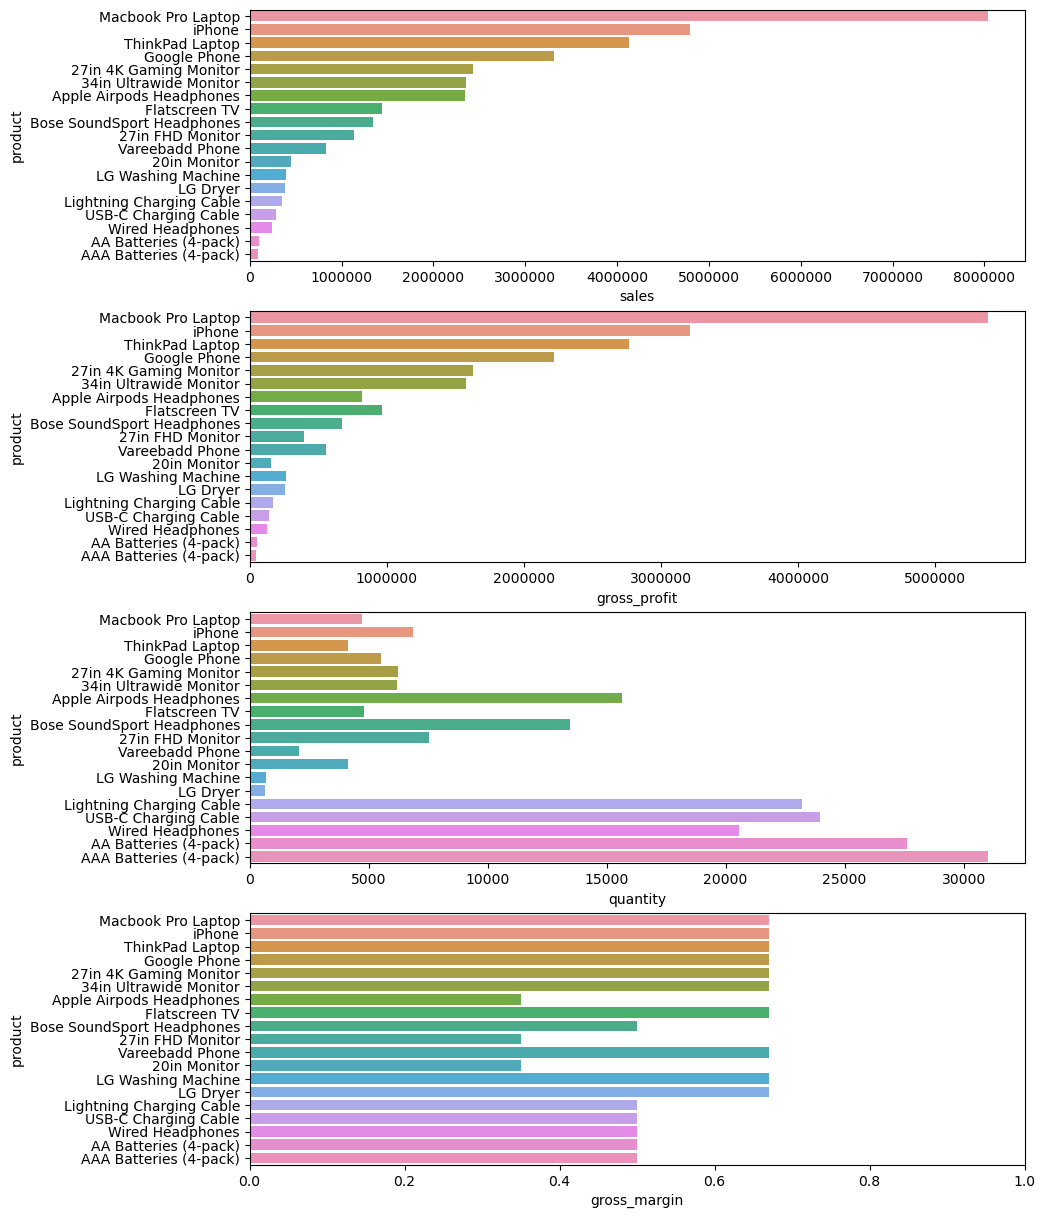

In [61]:
plt.figure(figsize = [10, 15])

# Subplot 1: total sales per product
ax1 = plt.subplot(4, 1, 1)
sns.barplot( x = prod_perf['sales'], y = prod_perf.index)

# Subplot 2: total profit per product
ax2 = plt.subplot(4, 1, 2)
sns.barplot(x = prod_perf['gross_profit'], y = prod_perf.index)

# Subplot 3: total units sold per product
ax3 = plt.subplot(4, 1, 3)
sns.barplot(x = prod_perf['quantity'], y = prod_perf.index)

# Subplot 4: average gross margin per product
ax4 = plt.subplot(4, 1, 4)
sns.barplot(x = prod_perf['gross_margin'], y = prod_perf.index)
ax4.set_xlim(0, 1)

plt.show()

In [62]:
# Compare product performance based on profit and units sold

products_sales_qty = sales.groupby(['product']).agg({
                                'gross_profit': 'sum',
                                'quantity':'sum'}).sort_values(by = 'gross_profit', ascending = False)

products_sales_qty

,gross_profit,quantity
product,,
Macbook Pro Laptop,5384053.00,4727
iPhone,3211243.00,6847
ThinkPad Laptop,2765718.74,4128
Google Phone,2223462.00,5531
27in 4K Gaming Monitor,1631233.61,6243
34in Ultrawide Monitor,1578203.59,6199
Flatscreen TV,968418.00,4818
Apple Airpods Headphones,821992.50,15657
Bose SoundSport Headphones,672698.70,13454


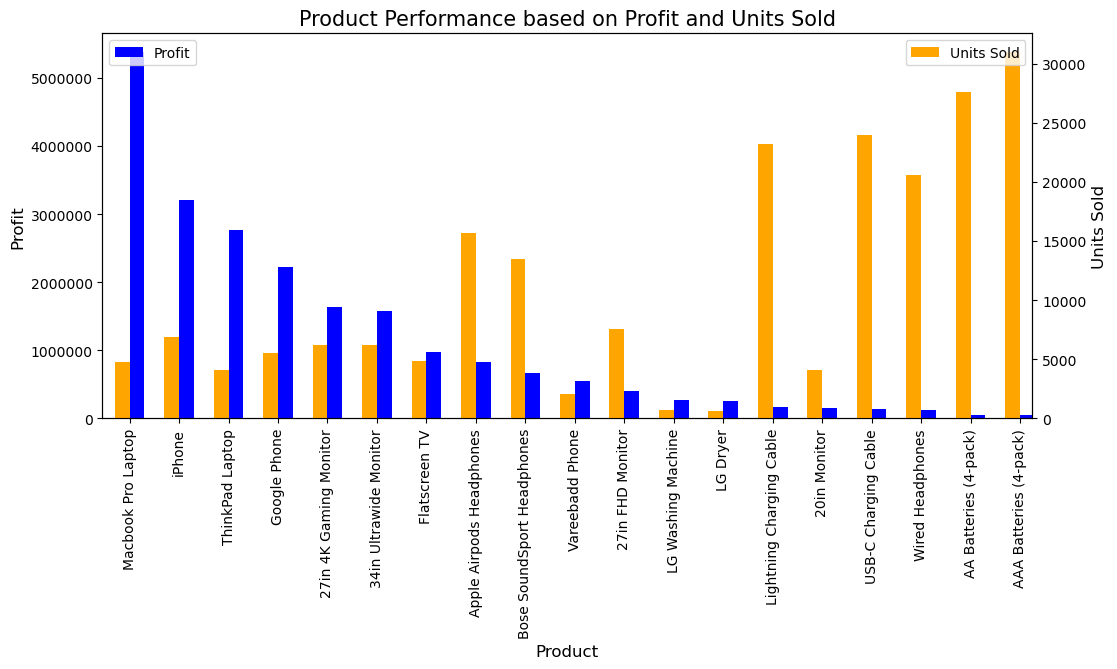

In [63]:
fig = plt.figure(figsize = [12, 5])

ax1 = fig.add_subplot(111) 
ax2 = ax1.twinx() # create another axes that share the same x-axis
width = .3

products_sales_qty['gross_profit'].plot(kind = 'bar', color = 'blue', ax = ax1, width = width, position = 0)
products_sales_qty['quantity'].plot(kind = 'bar', color = 'orange', ax = ax2, width = width, position = 1)


plt.title('Product Performance based on Profit and Units Sold', fontsize = 15)
ax1.set_ylabel('Profit', fontsize = 12)
ax1.set_xlabel('Product', fontsize = 12)
ax2.set_ylabel('Units Sold', fontsize = 12)
ax1.legend(['Profit'], loc = 'upper left')
ax2.legend(['Units Sold'], loc = 'upper right')

plt.show()

Reiterating the result of the correlation plot between numeric variables:
- There is a weak negative correlation between quantity and price, cost, sales, gross profit, and gross margin.
- There is a perfect positive correlation between cost, price, sales, and gross profit.
- There is a strong positive correlation between gross margin and price, cost, sales, and gross profit

*a. Do the most profitable products also have the highest sales?*<br>
    Yes, products with the highest sales are also the most profitable.

*b. Do products with the highest unit sales also have the best profitability?*<br>
    No, products with the highest unit sales are not the most profitable.

*c. Do products with high sales also have high profit margins?*<br>
    Yes, product with high sales also have high profit margin.

*d. Do the products with the highest number of sold units also yield the highest profit margins?*<br>
    No, products with the highest number of units sold have lower profit margin.

### 10. Compare sales across all cities

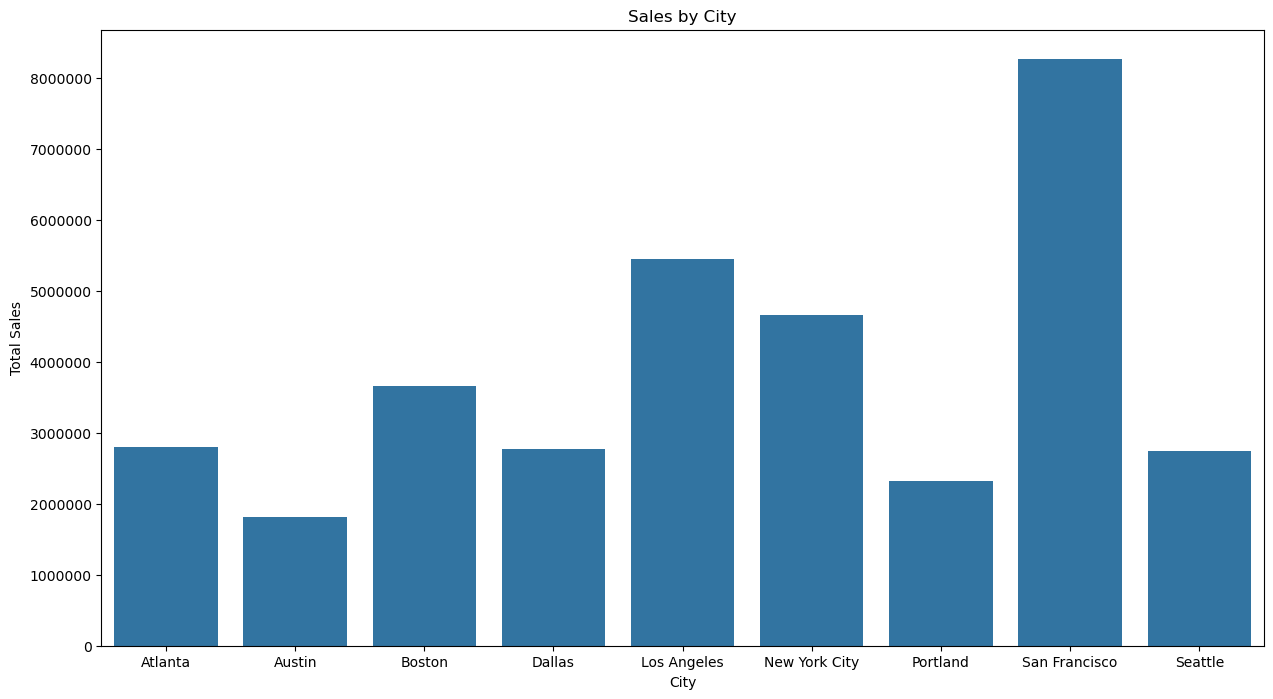

In [64]:
city_sales = sales.groupby(['city'])['sales'].sum()

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

sns.barplot(x = city_sales.index, y = city_sales.values, color = base_color)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

- San Francisco had the highest sales in 2019.

### 9. What are the top products sold in San Francisco?

In [65]:
san_fran_sales = sales[sales['city'] == 'San Francisco']
san_fran_prod = san_fran_sales.groupby(['product'])['sales'].sum().reset_index().sort_values(by = 'sales', ascending = False)
san_fran_prod

,product,sales
13,Macbook Pro Laptop,1931200.00
18,iPhone,1162000.00
14,ThinkPad Laptop,962990.37
9,Google Phone,814200.00
1,27in 4K Gaming Monitor,569385.40
6,Apple Airpods Headphones,559500.00
3,34in Ultrawide Monitor,549465.54
8,Flatscreen TV,346200.00
7,Bose SoundSport Headphones,331466.85
2,27in FHD Monitor,271781.88


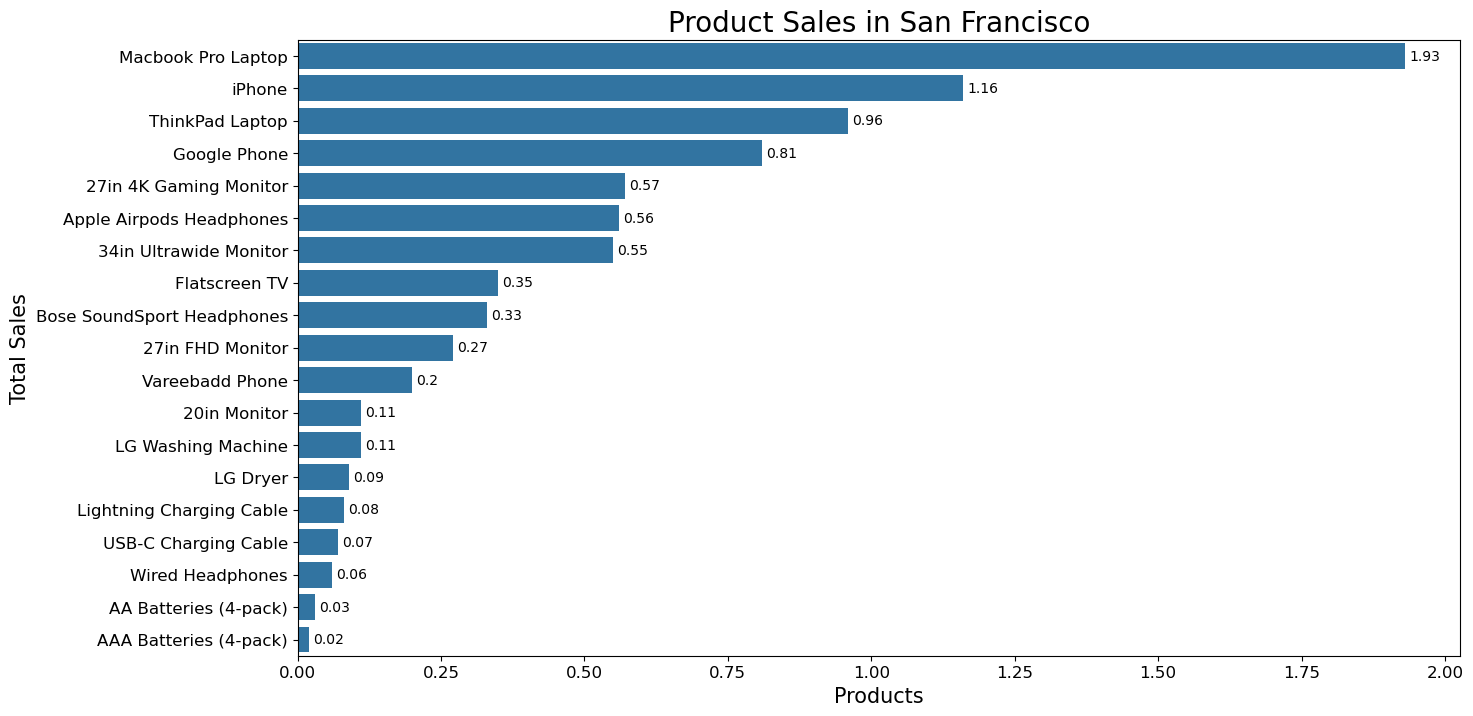

In [66]:
# Visualize the most popular products based on sales in San Francisco

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = round(san_fran_prod['sales']/1000000, 2), y = san_fran_prod['product'], color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Product Sales in San Francisco', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show;

- The highst-selling products in San Francisco are Macbook Pro Laptop, iPhone, ThinkPad Laptop, and Google Phone.	

### 12. Compare sales across all states

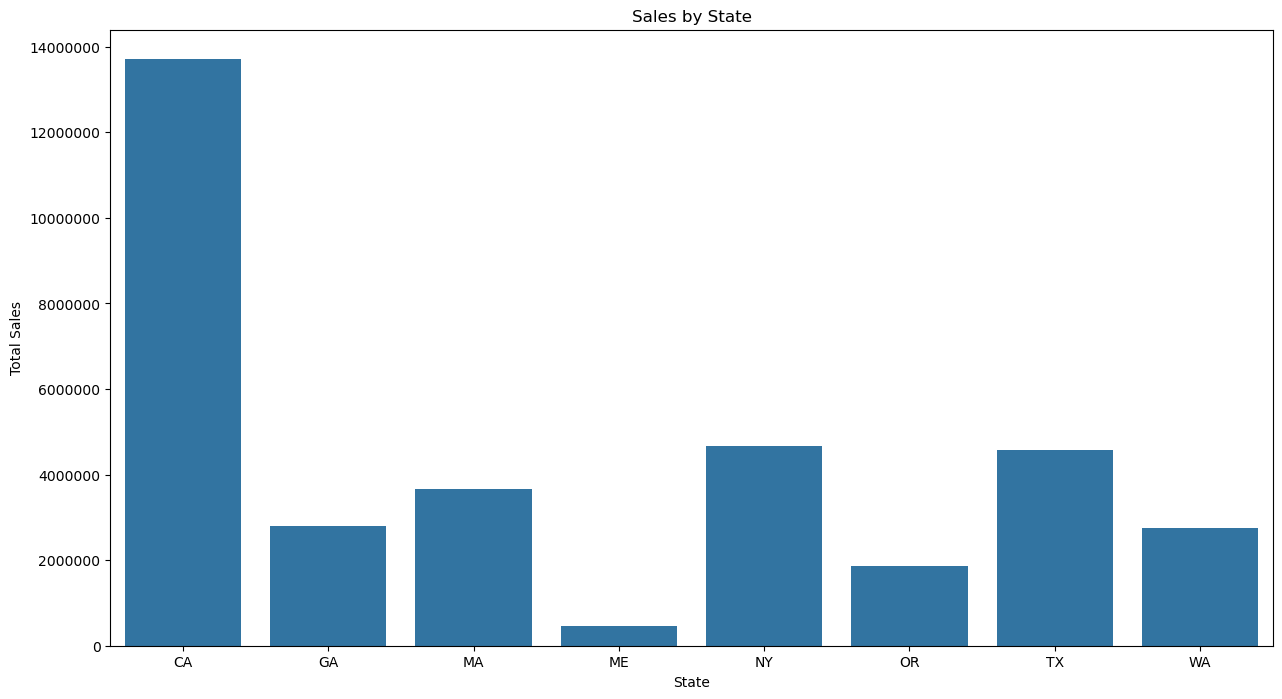

In [67]:
state_sales = sales.groupby(['state'])['sales'].sum()

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

sns.barplot(x = state_sales.index, y = state_sales.values, color = base_color)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

- California has the highest sales in 2019.

### 13. What are the top products sold in California

In [68]:
ca_sales = sales[sales['state'] == 'CA']
ca_prod = ca_sales.groupby(['product'])['sales'].sum().reset_index().sort_values(by = 'sales', ascending = False)
ca_prod

,product,sales
13,Macbook Pro Laptop,3207900.00
18,iPhone,1944600.00
14,ThinkPad Laptop,1602983.97
9,Google Phone,1323000.00
1,27in 4K Gaming Monitor,960545.37
6,Apple Airpods Headphones,930450.00
3,34in Ultrawide Monitor,912355.99
8,Flatscreen TV,564300.00
7,Bose SoundSport Headphones,543945.60
2,27in FHD Monitor,455219.65


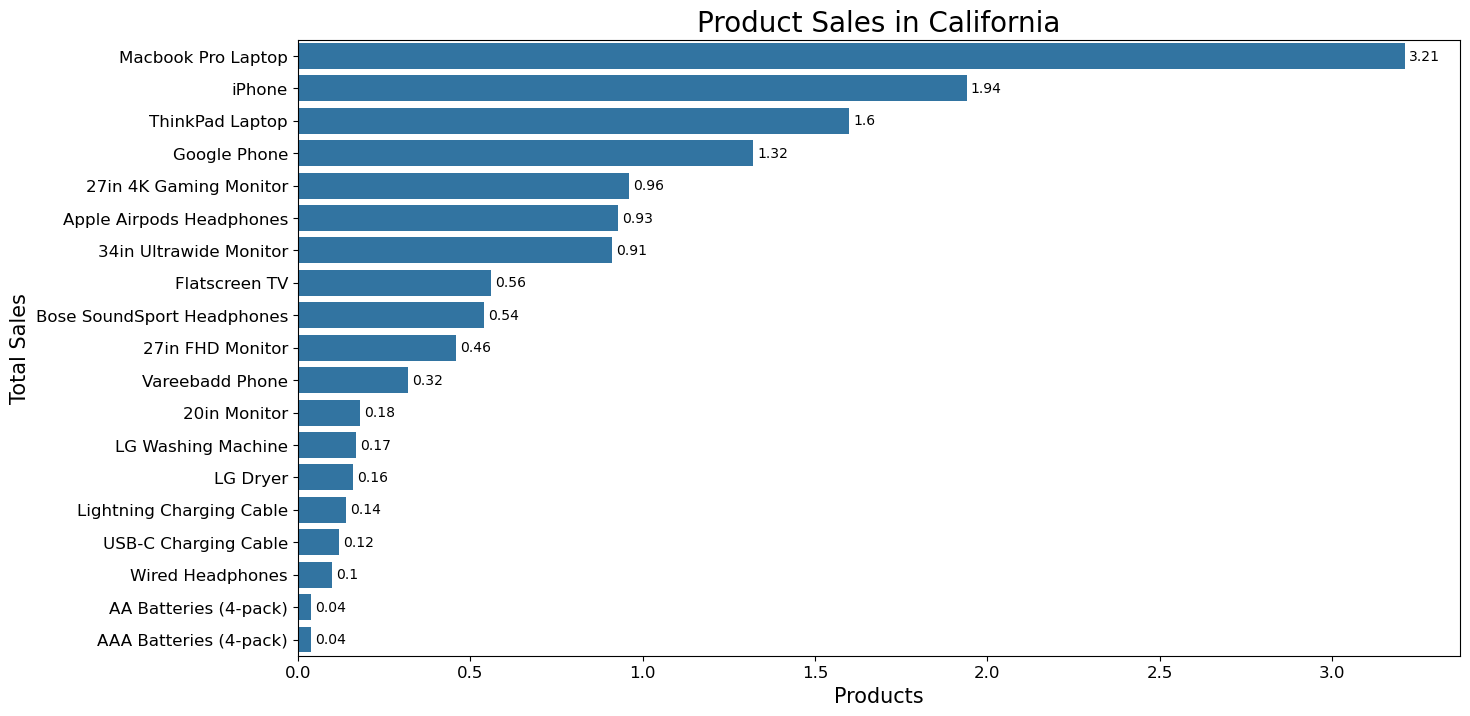

In [69]:
# Visualize the most popular products based on sales in California

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = round(ca_prod['sales']/1000000, 2), y = ca_prod['product'], color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Product Sales in California', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show;

- The highst-selling products in California are Macbook Pro Laptop, iPhone, ThinkPad Laptop, and Google Phone.

### 14. Analyze the daily number of orders and daily sales

In [70]:
# Daily number of orders and daily sales

daily_perf = sales.groupby(['date']).agg({
                                    'order_id': 'nunique',
                                    'sales': 'sum'
})
daily_perf

,order_id,sales
date,,
2019-01-01,287,65681.94
2019-01-02,308,70813.20
2019-01-03,286,47046.20
2019-01-04,282,62012.21
2019-01-05,301,46524.63
...,...,...
2019-12-27,734,126628.05
2019-12-28,789,134015.50
2019-12-29,800,156024.62


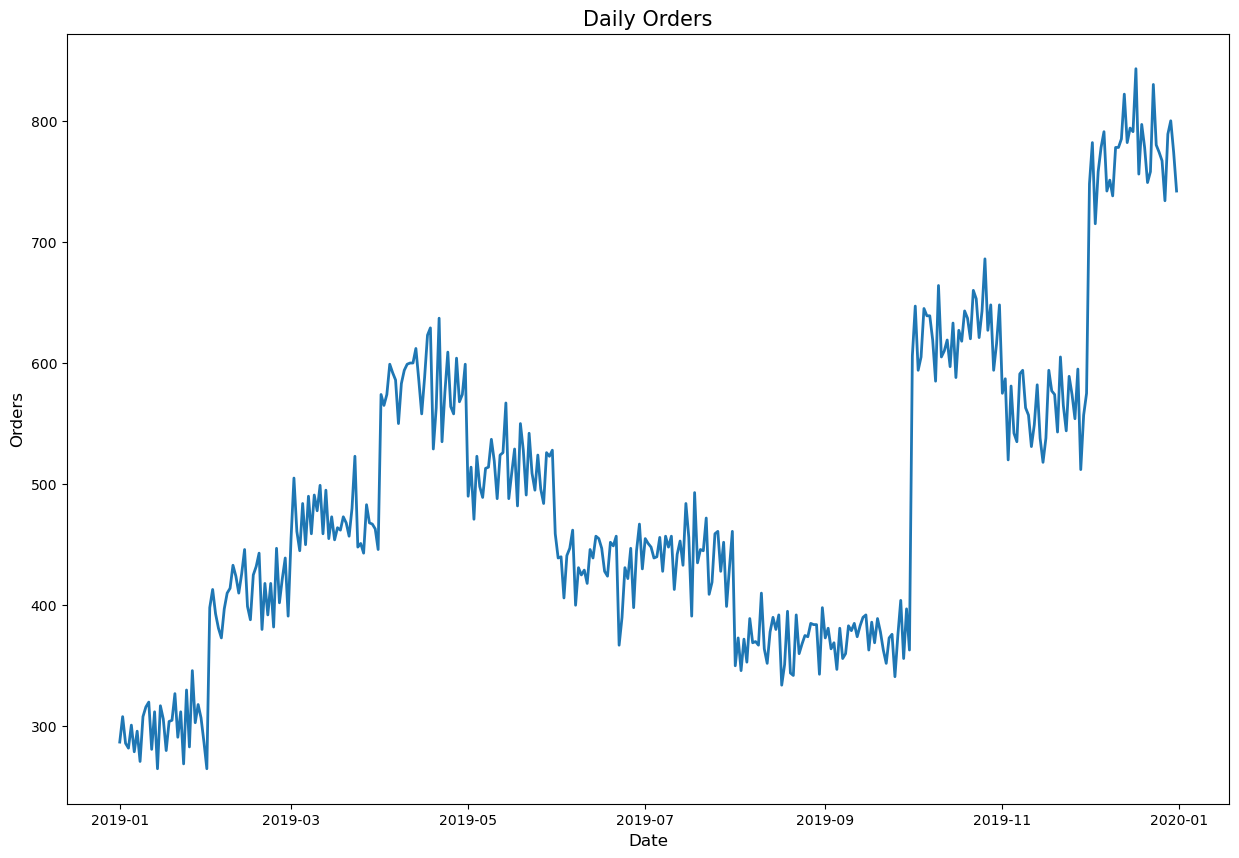

In [71]:
# Visualize daily orders

daily_perf['order_id'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Orders', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Orders', fontsize = 12)
plt.show()

- From January to May, orders increased consistently, but began to decrease until September, then increased again in October, dropped in November and increased again in December. December had the highest number of orders.

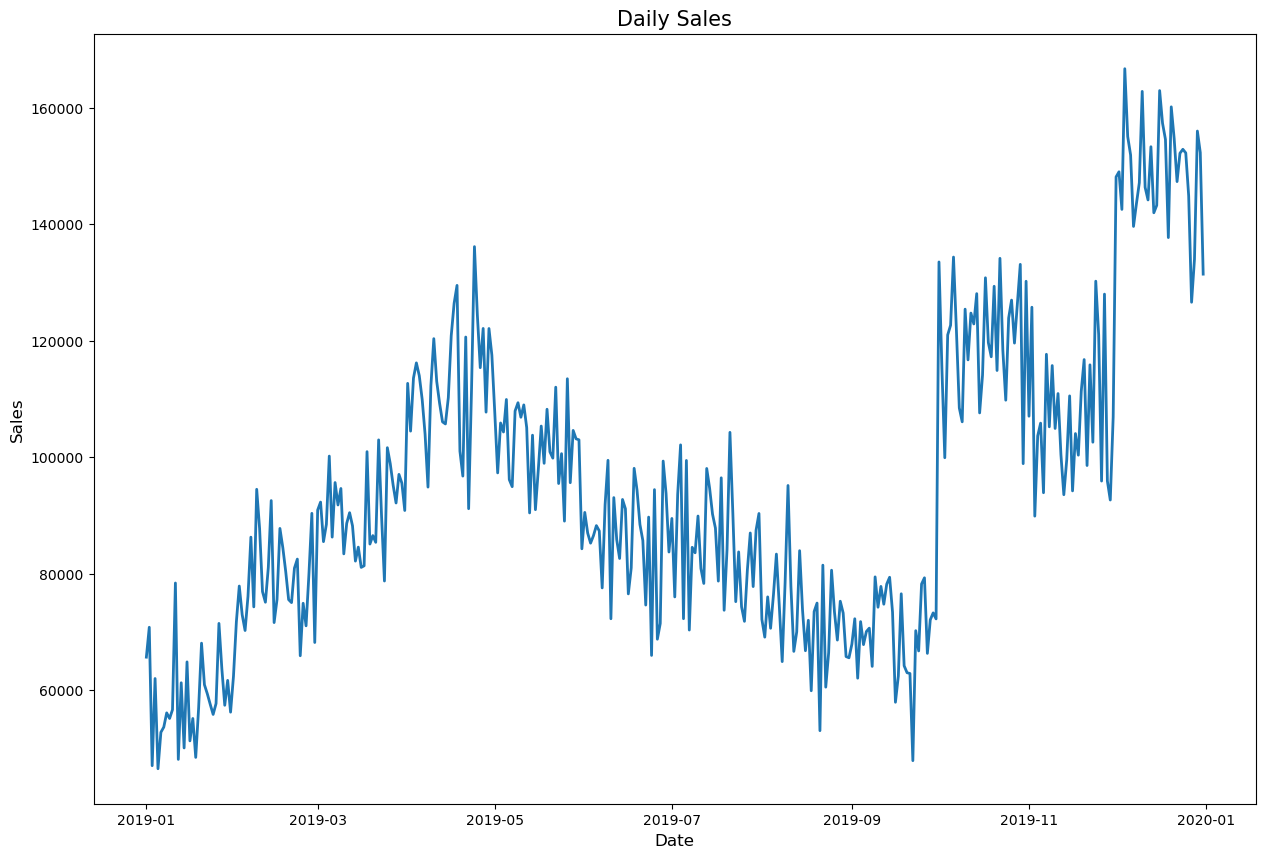

In [72]:
# Visualize daily sales

daily_perf['sales'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Sales', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.show()

- From January to May, sales increased consistently, but began to decrease until September, then increased again in October, dropped in November, and increased again in December. December had the highest sales.

### 15. Which times of the day generated the highest sales? highest profit?

In [73]:
# Convert hour and dow columns into ordered categorical types

ordered_var_dict = {'hour': ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', 
                             '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', 
                             '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'],
                   'dow': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordered_var_dict:
    ordered_var = pd.CategoricalDtype(categories = ordered_var_dict[var], ordered = True)
    sales[var] = sales[var].astype(ordered_var)

In [74]:
# total sales and total profit per time of the day

hourly = sales.groupby(['hour']).agg({
                                    'sales': 'sum',
                                    'gross_profit': 'sum'}).reset_index().sort_values(by = 'hour')
hourly

,hour,sales,gross_profit
0,12 AM,711060.59,439237.08
1,01 AM,458561.97,286261.56
2,02 AM,232586.50,143826.85
3,03 AM,144697.99,88865.41
4,04 AM,162396.09,100556.96
5,05 AM,230564.88,143215.63
6,06 AM,448113.00,277516.33
7,07 AM,744854.12,463032.24
8,08 AM,1192348.97,743507.10
9,09 AM,1639030.58,1018542.00


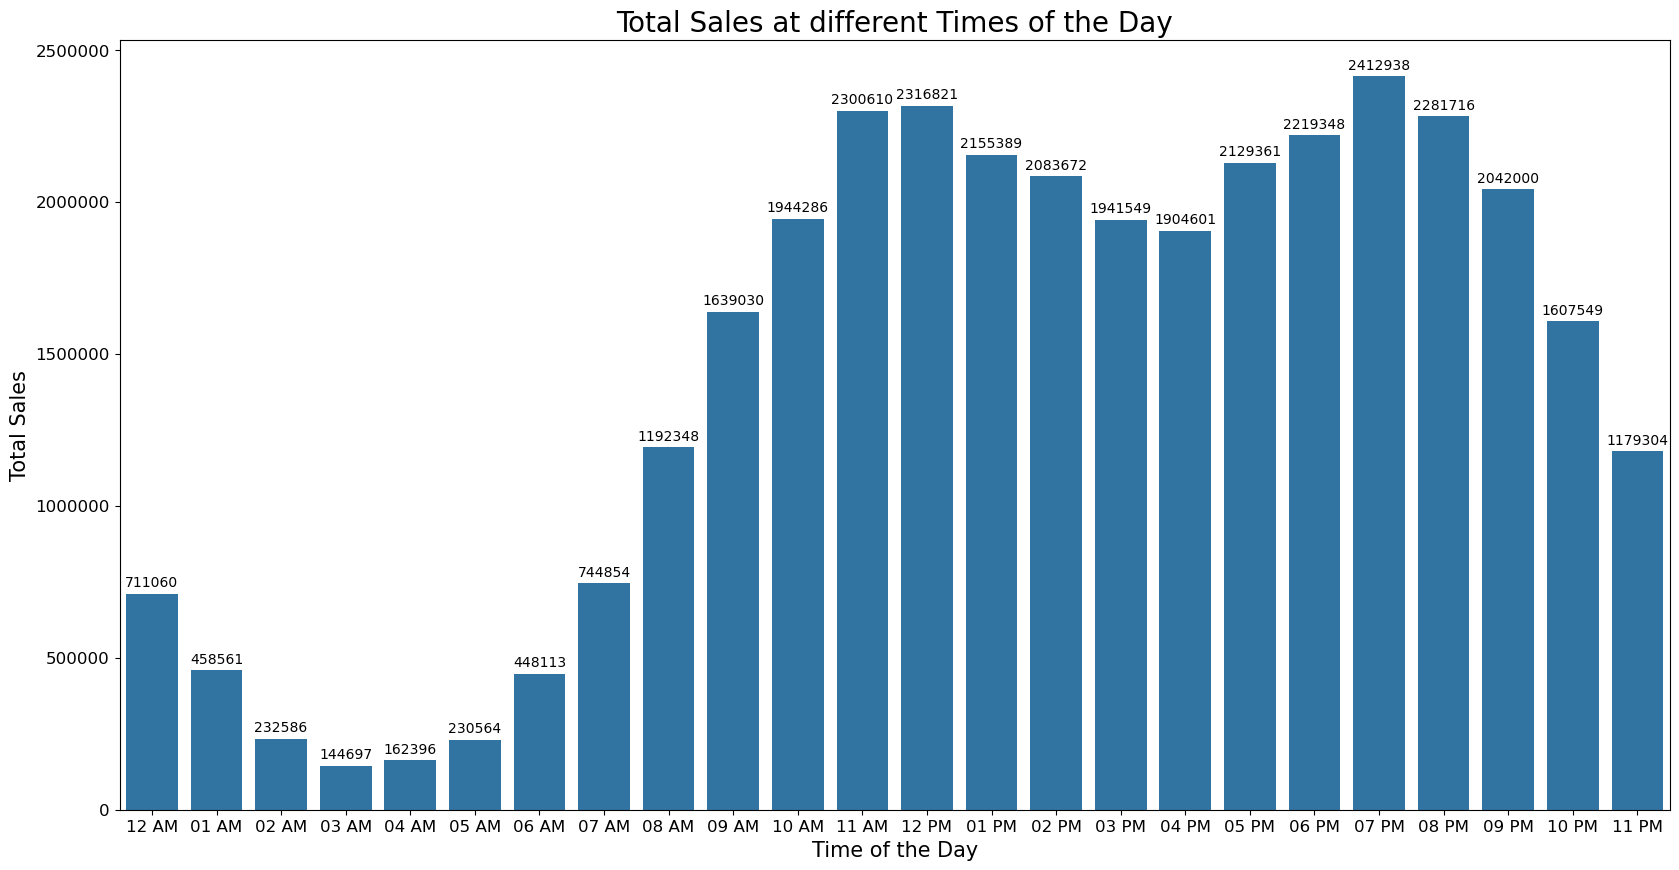

In [75]:
plt.figure(figsize = [20, 10]) 
base_color = sns.color_palette()[0]

ax = sns.barplot(data = hourly, x = hourly['hour'], y = hourly['sales'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Sales at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Total Sales', size = 15)

plt.show();

- Sales above $ 2 million were generated between 11AM and 2PM and between 5PM and 9PM.

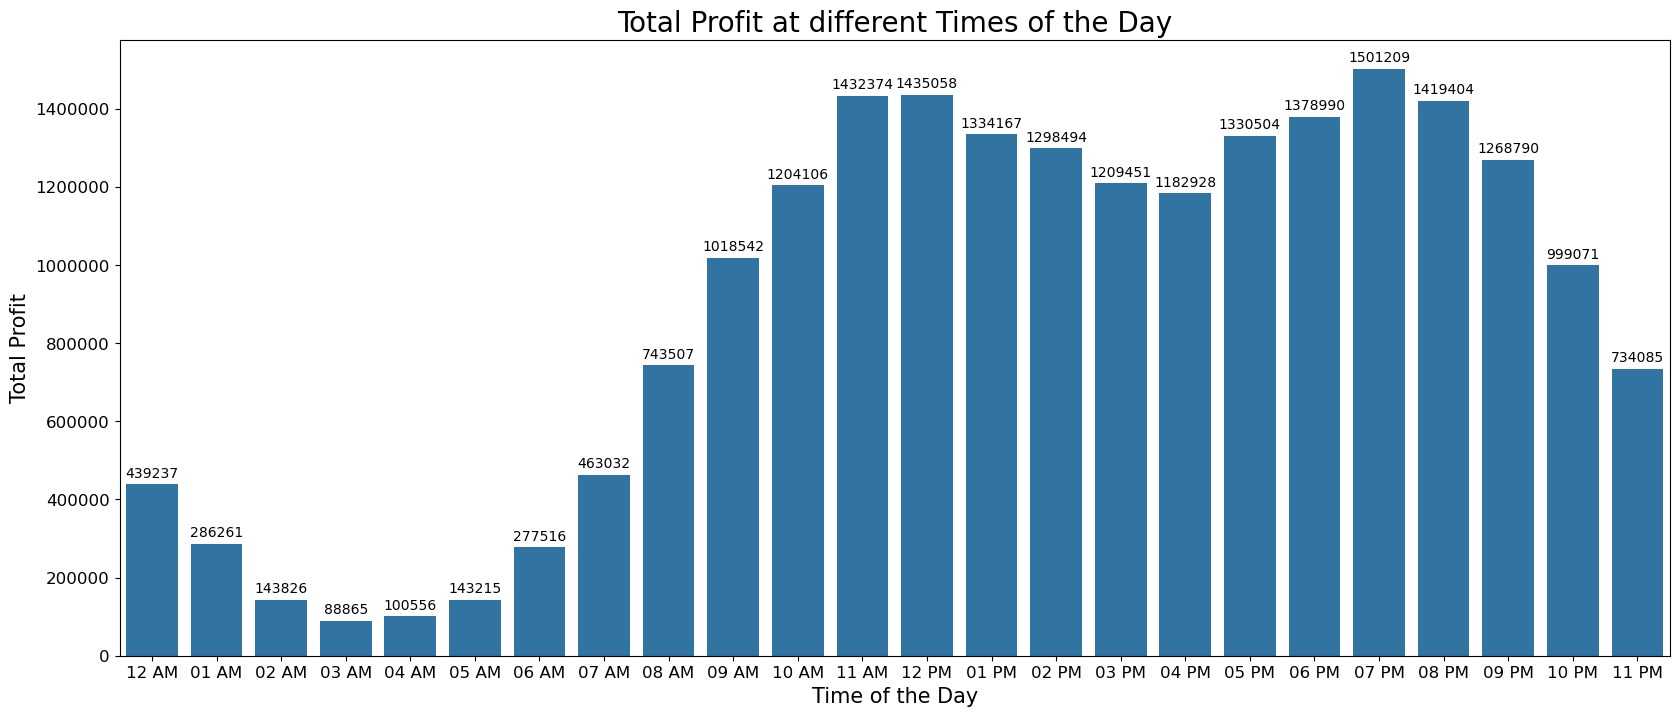

In [76]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(data = hourly, x = hourly['hour'], y = hourly['gross_profit'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Profit at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Total Profit', size = 15)

plt.show();

- Profit above $1.3 million were generated between 11AM and 1PM and between 5PM and 8PM.

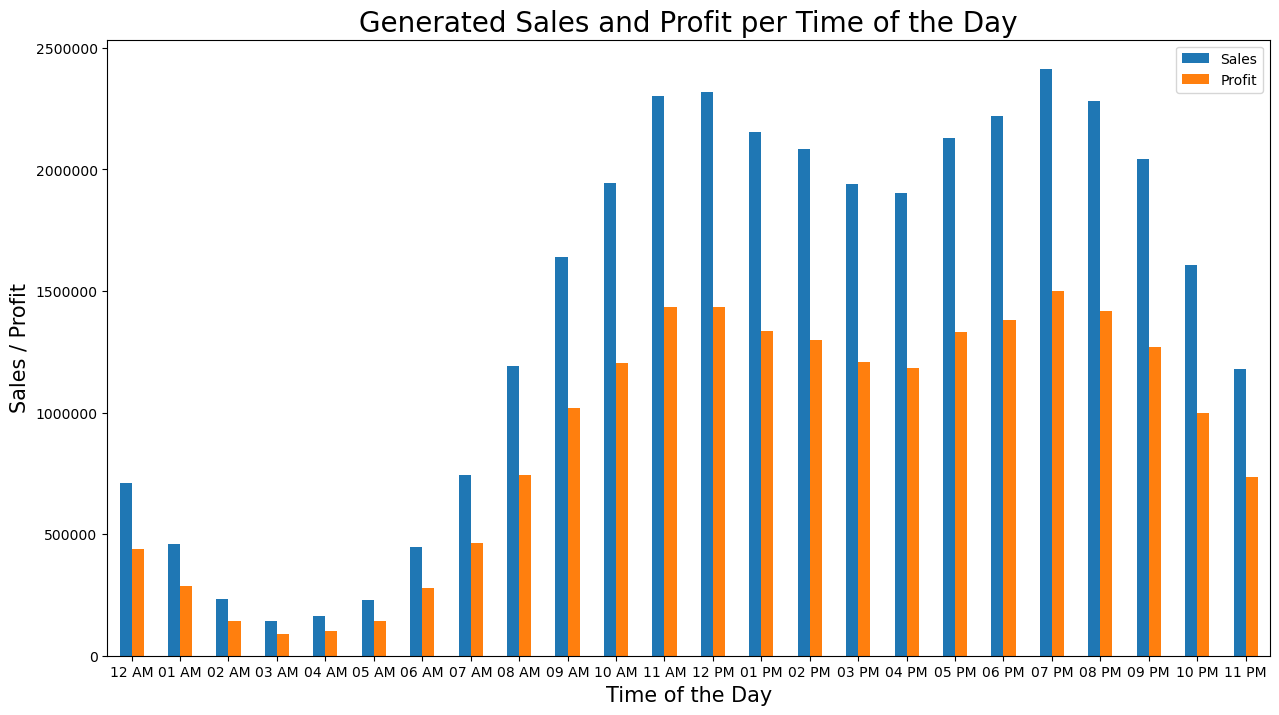

In [77]:
# Visualize monthly sales vs monthly profit (grouped bar)

hourly.plot(kind='bar', x = 'hour', figsize = (15, 8))
plt.title('Generated Sales and Profit per Time of the Day', fontsize = 20)
plt.xlabel('Time of the Day', fontsize = 15)
plt.ylabel('Sales / Profit', fontsize = 15)
plt.legend(["Sales", "Profit"])
plt.xticks(rotation = 360)
plt.show()

### 16. Which day of the week has the highest number of orders?

In [78]:
weekday_perf = sales.groupby(['dow']).agg({
                                            'order_id': 'nunique',
                                            'sales': 'sum'}).reset_index()
weekday_perf

,dow,order_id,sales
0,Monday,25494,4883326.72
1,Tuesday,26063,5087956.78
2,Wednesday,25363,4980151.97
3,Thursday,25368,4839465.16
4,Friday,25216,4855938.38
5,Saturday,25420,4904357.01
6,Sunday,25482,4932169.66


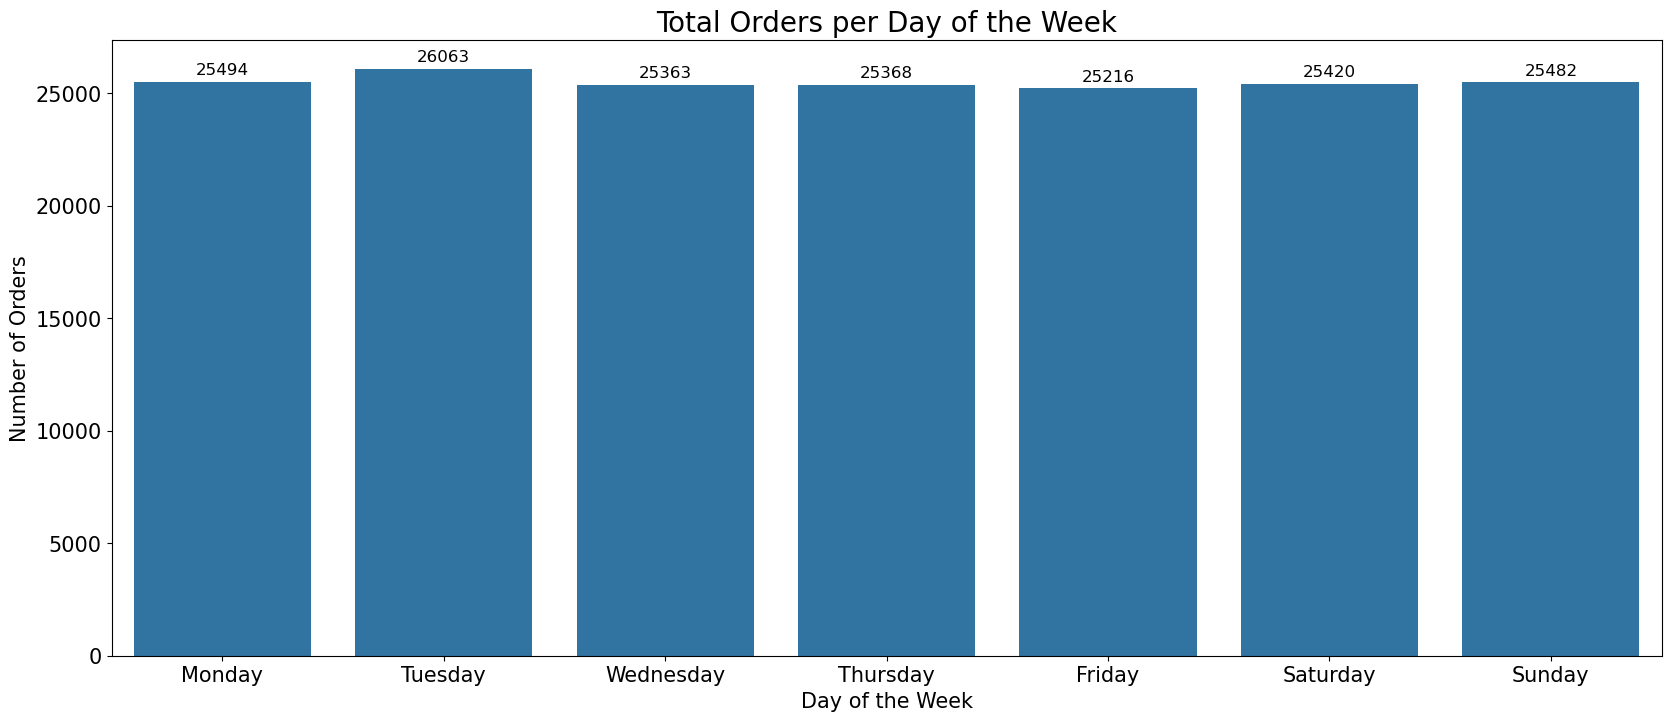

In [79]:
# Visualize number of orders per day of the week

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = weekday_perf['dow'], y = weekday_perf['order_id'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Orders per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.show();

- It's surprising that orders per day of the week have stayed consistent for 2019 with an average of 25,485.

### 17. Which day of the week has the highest sales generated?

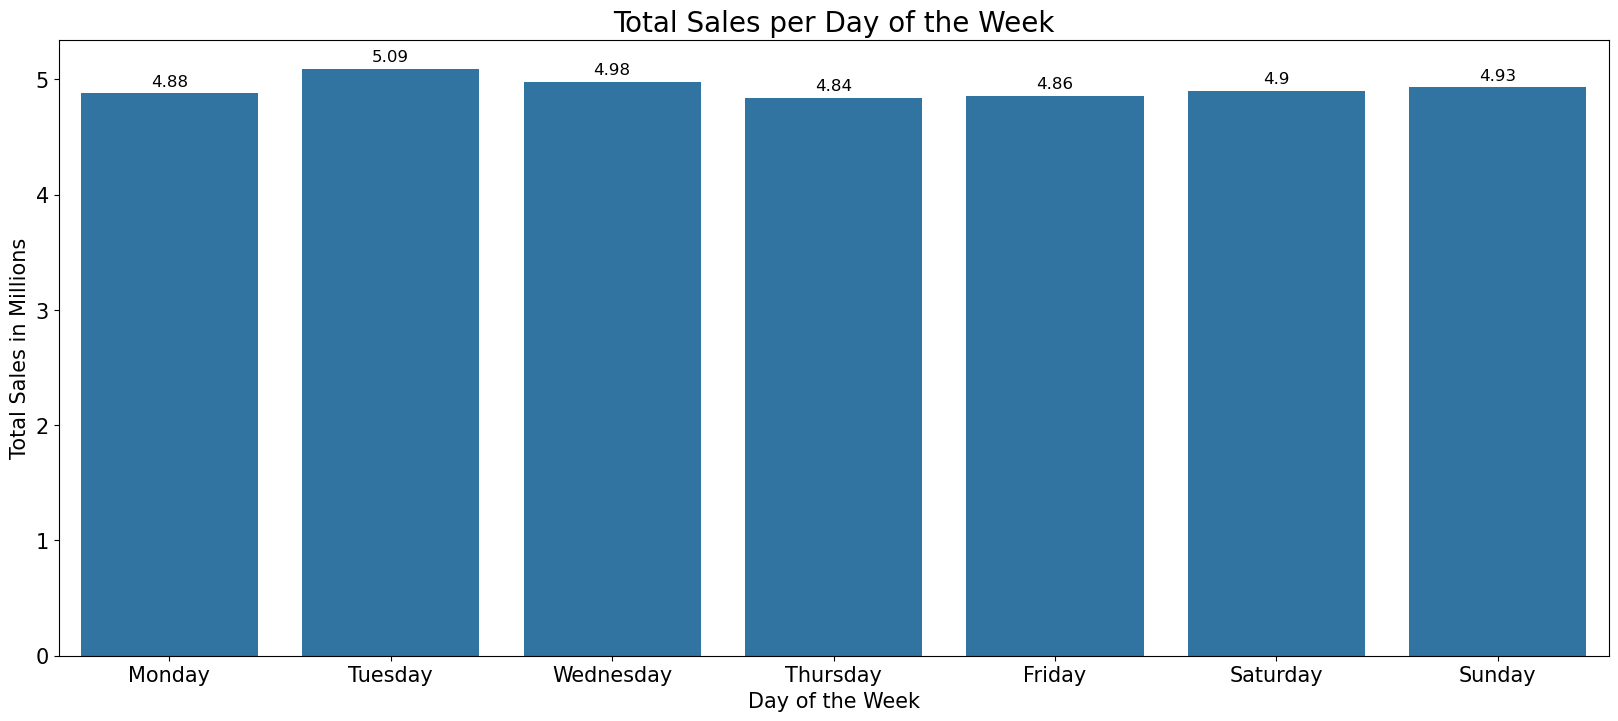

In [80]:
# Visualize total sales per day of the week

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = weekday_perf['dow'], y = round(weekday_perf['sales']/1000000, 2), color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Sales per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Total Sales in Millions', size = 15)
plt.show();

- Sales generated per day of the week has also been consistent at average sales of $4.9 million.

### 18. Performance per Category Over Time based on Sales

In [81]:
sales_by_cat = sales.groupby(['period', 'category'])['sales'].sum().reset_index()
sales_by_cat

,period,category,sales
0,2019-01,appliance,48600.00
1,2019-01,batteries,10237.21
2,2019-01,charging cables,32509.40
3,2019-01,headphones,200954.60
4,2019-01,laptops,614797.83
...,...,...,...
91,2019-12,headphones,526742.27
92,2019-12,laptops,1632094.61
93,2019-12,monitors,866437.56
94,2019-12,smartTV,199800.00


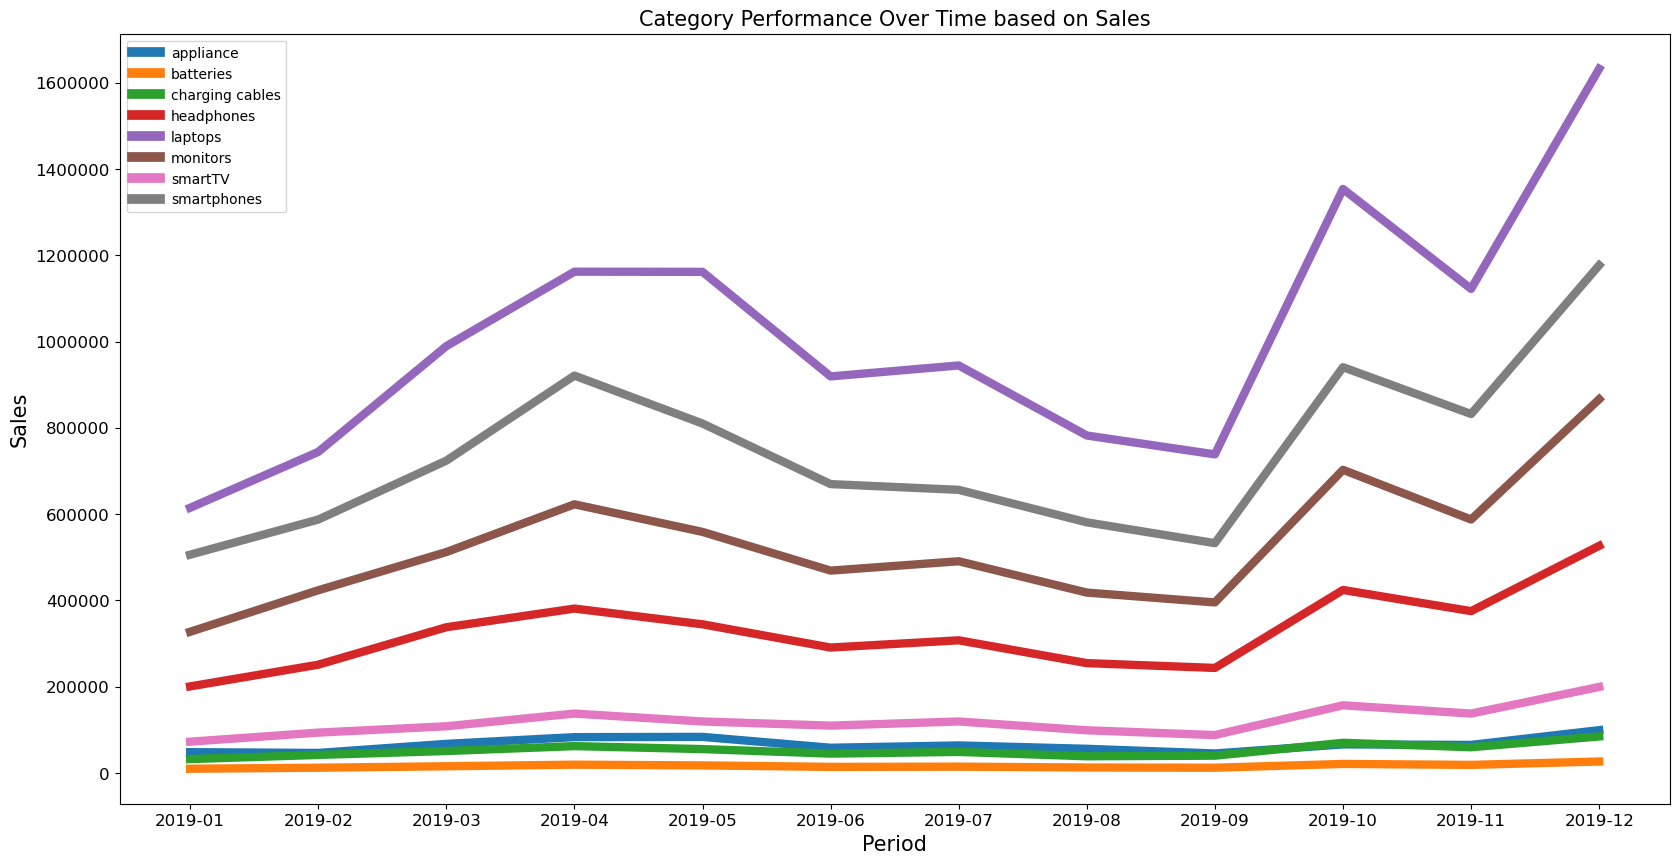

In [82]:
fig = plt.figure(figsize = [20, 10])

ax = sns.lineplot(data=sales_by_cat, x = sales_by_cat['period'].astype(str), y = 'sales', hue = 'category', linewidth = 6)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('Category Performance Over Time based on Sales', size = 15)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(7)

plt.show()

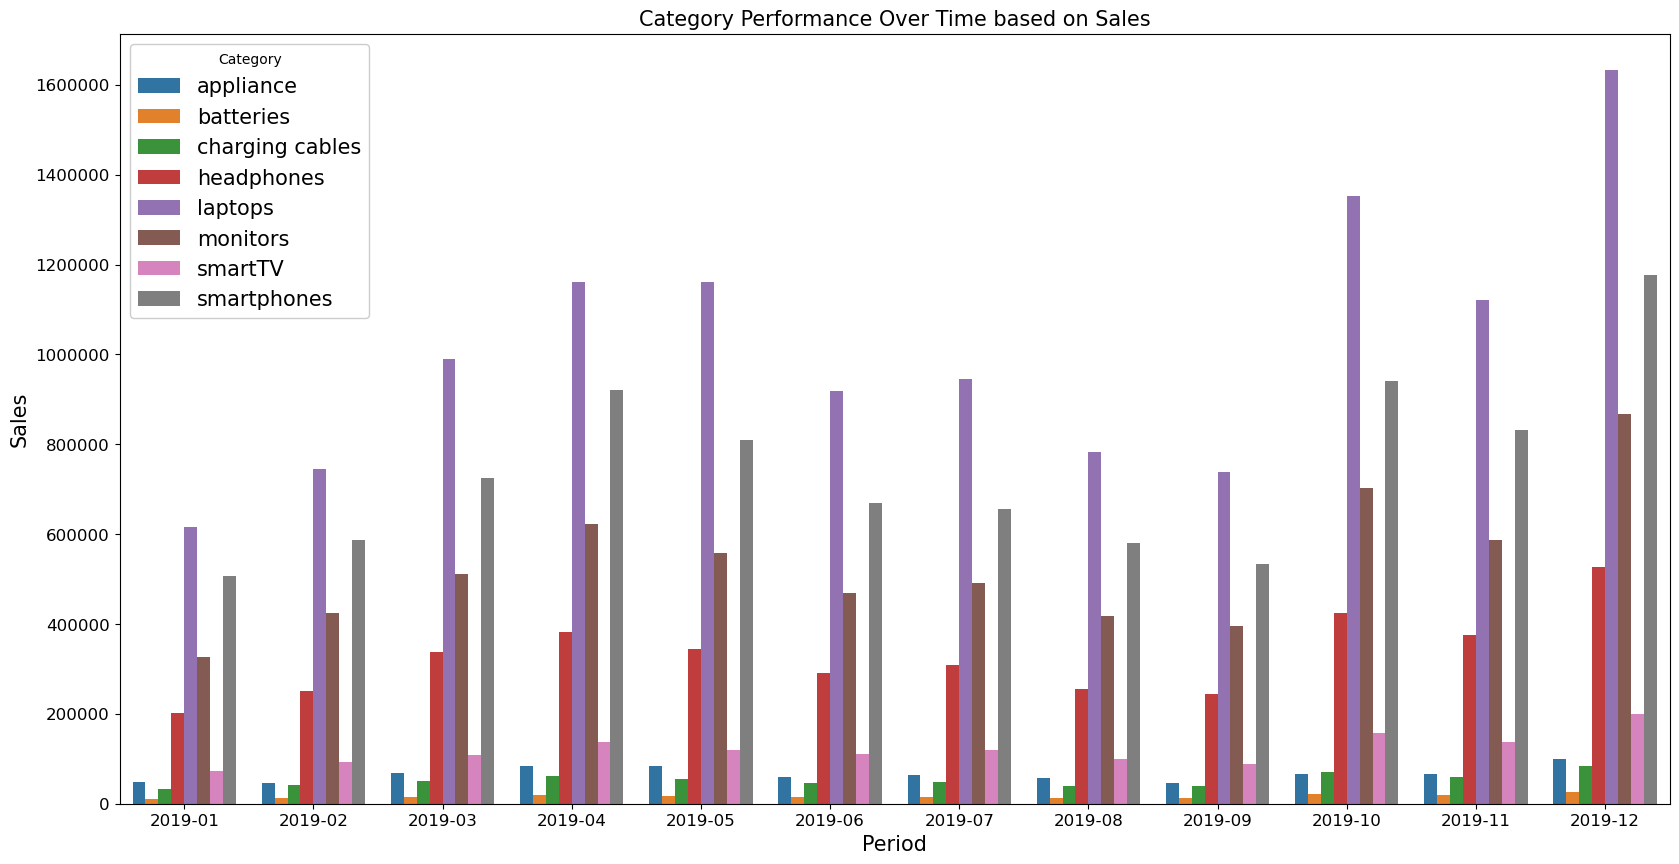

In [83]:
fig = plt.figure(figsize = [20, 10])
ax = sns.barplot(data = sales_by_cat, x = 'period', y = 'sales', hue = 'category', errwidth = 0)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('Category Performance Over Time based on Sales', size = 15);

- The laptops category consistently had the highest monthly sales, while the batteries category had the lowest.

### 19.	Category Performance Over Time based on Units Sold

In [84]:
qty_cat = sales.groupby(['period', 'category'])['quantity'].sum().reset_index()
qty_cat

,period,category,quantity
0,2019-01,appliance,81
1,2019-01,batteries,3019
2,2019-01,charging cables,2432
3,2019-01,headphones,2554
4,2019-01,laptops,451
...,...,...,...
91,2019-12,headphones,6649
92,2019-12,laptops,1182
93,2019-12,monitors,3244
94,2019-12,smartTV,666


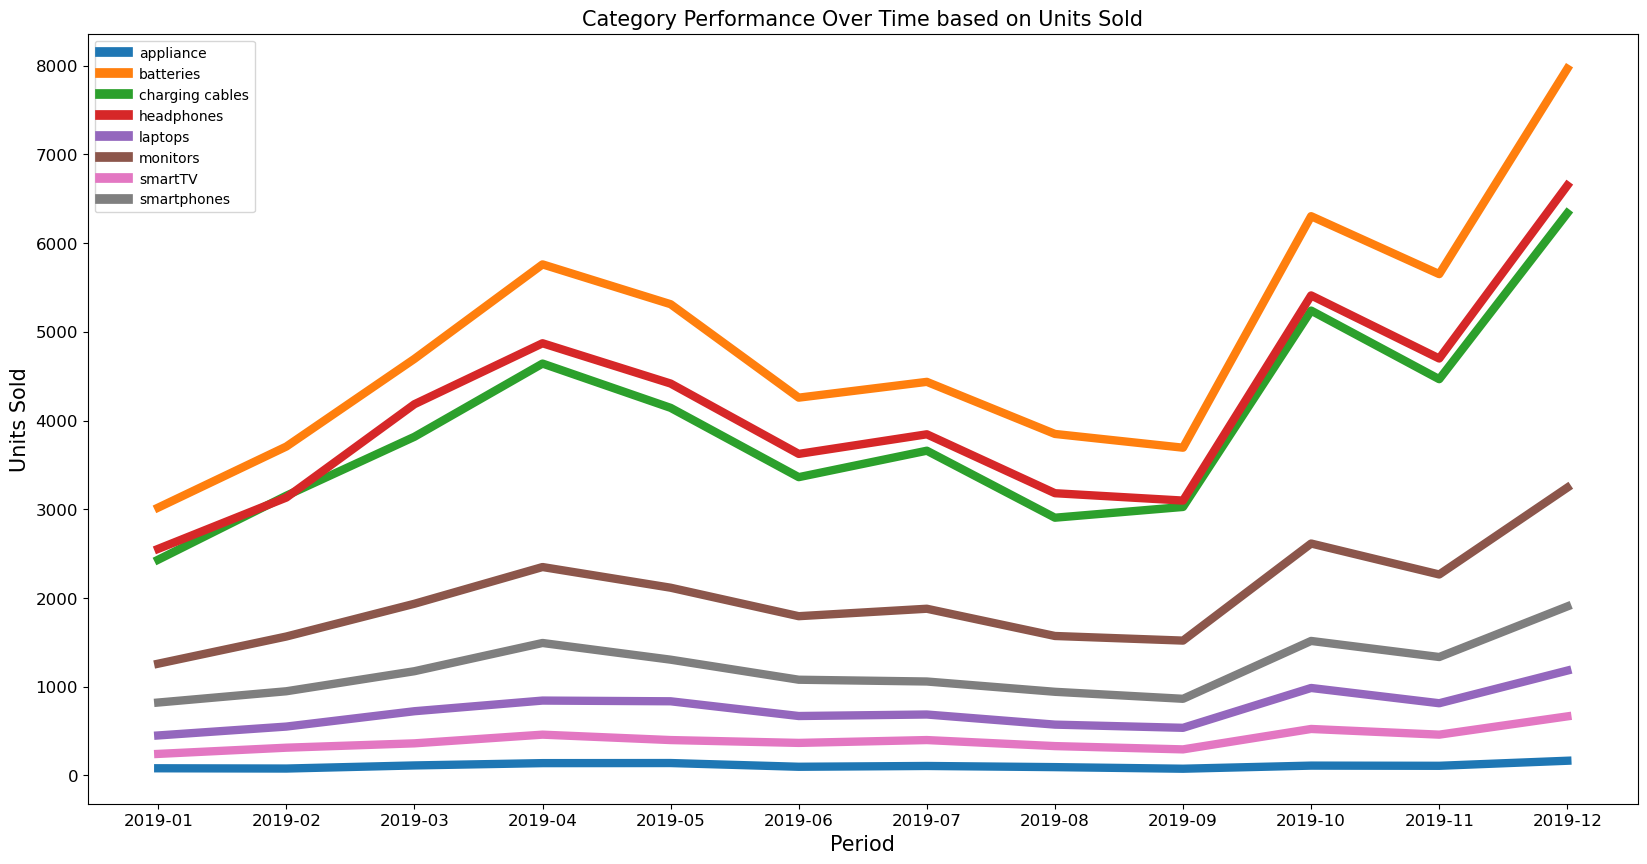

In [85]:
fig = plt.figure(figsize = [20, 10])

ax = sns.lineplot(data=qty_cat, x = qty_cat['period'].astype(str), y = 'quantity', hue = 'category', linewidth = 6)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Units Sold', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('Category Performance Over Time based on Units Sold', size = 15)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(7)

plt.show()

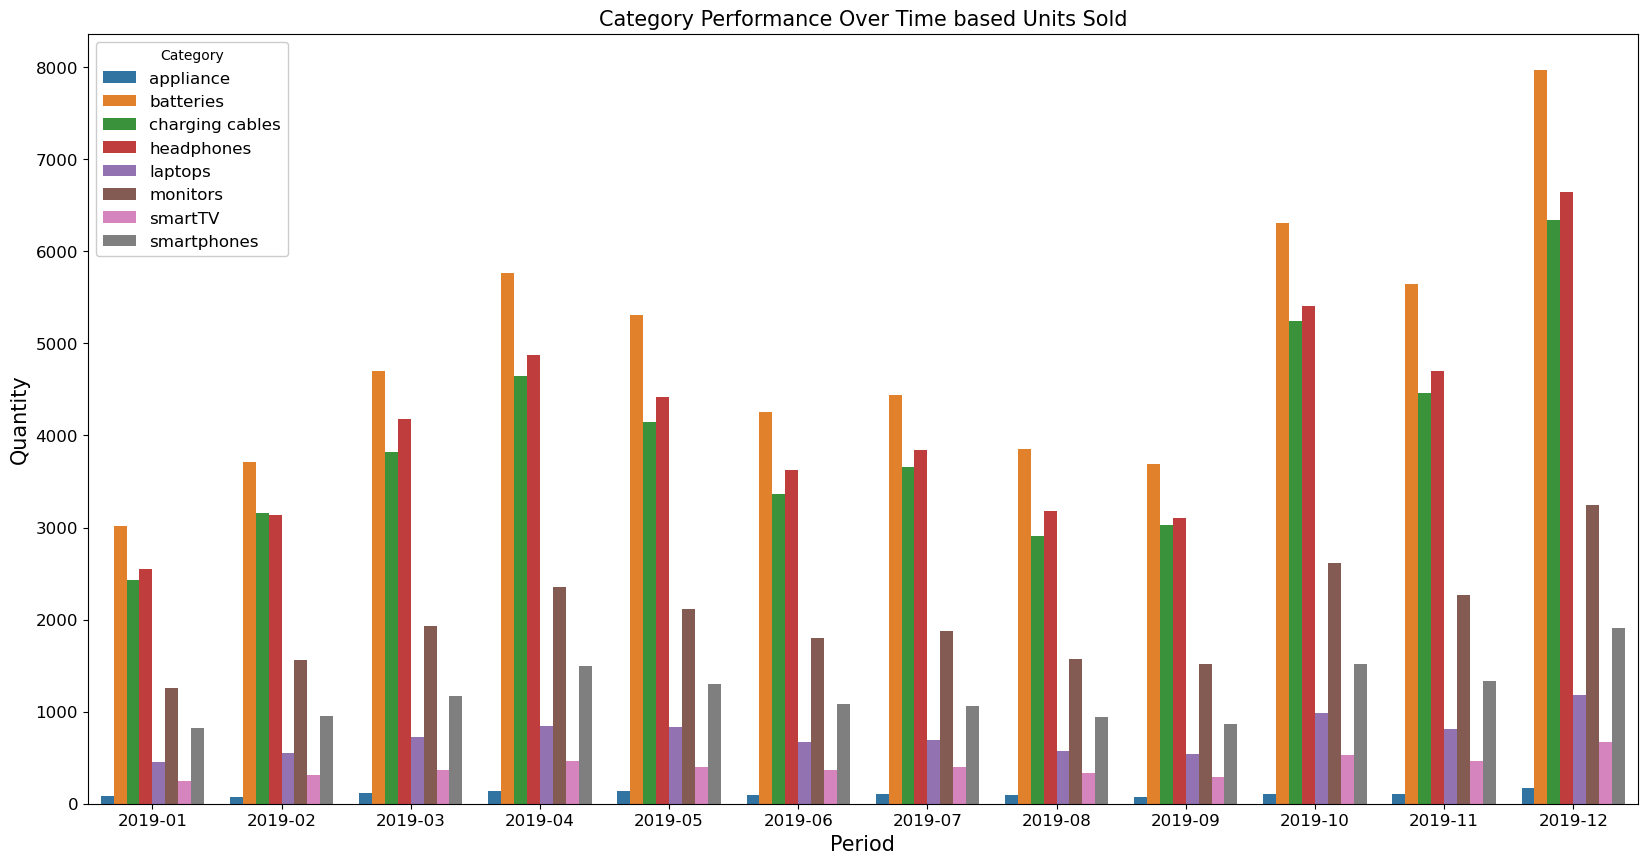

In [86]:
fig = plt.figure(figsize = [20, 10])
ax = sns.barplot(data = qty_cat, x = 'period', y = 'quantity', hue = 'category', errwidth = 0)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Quantity', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 12)
plt.title('Category Performance Over Time based Units Sold', size = 15);

- The batteries category consistently had the highest units sold, while the appliance category had the lowest.

#### 11. Monthly Sales Growth Rate

In [87]:
monthly_sales = sales.groupby(['period'])['sales'].sum().reset_index()
monthly_sales

,period,sales
0,2019-01,1813586.44
1,2019-02,2202022.42
2,2019-03,2807100.38
3,2019-04,3390670.24
4,2019-05,3152606.75
5,2019-06,2577802.26
6,2019-07,2647775.76
7,2019-08,2244467.88
8,2019-09,2097560.13
9,2019-10,3736726.88


In [88]:
monthly_sales['pct_change'] = monthly_sales['sales'].pct_change()
monthly_sales

,period,sales,pct_change
0,2019-01,1813586.44,NaN
1,2019-02,2202022.42,0.214181
2,2019-03,2807100.38,0.274783
3,2019-04,3390670.24,0.207891
4,2019-05,3152606.75,-0.070211
5,2019-06,2577802.26,-0.182327
6,2019-07,2647775.76,0.027145
7,2019-08,2244467.88,-0.152320
8,2019-09,2097560.13,-0.065453
9,2019-10,3736726.88,0.781464


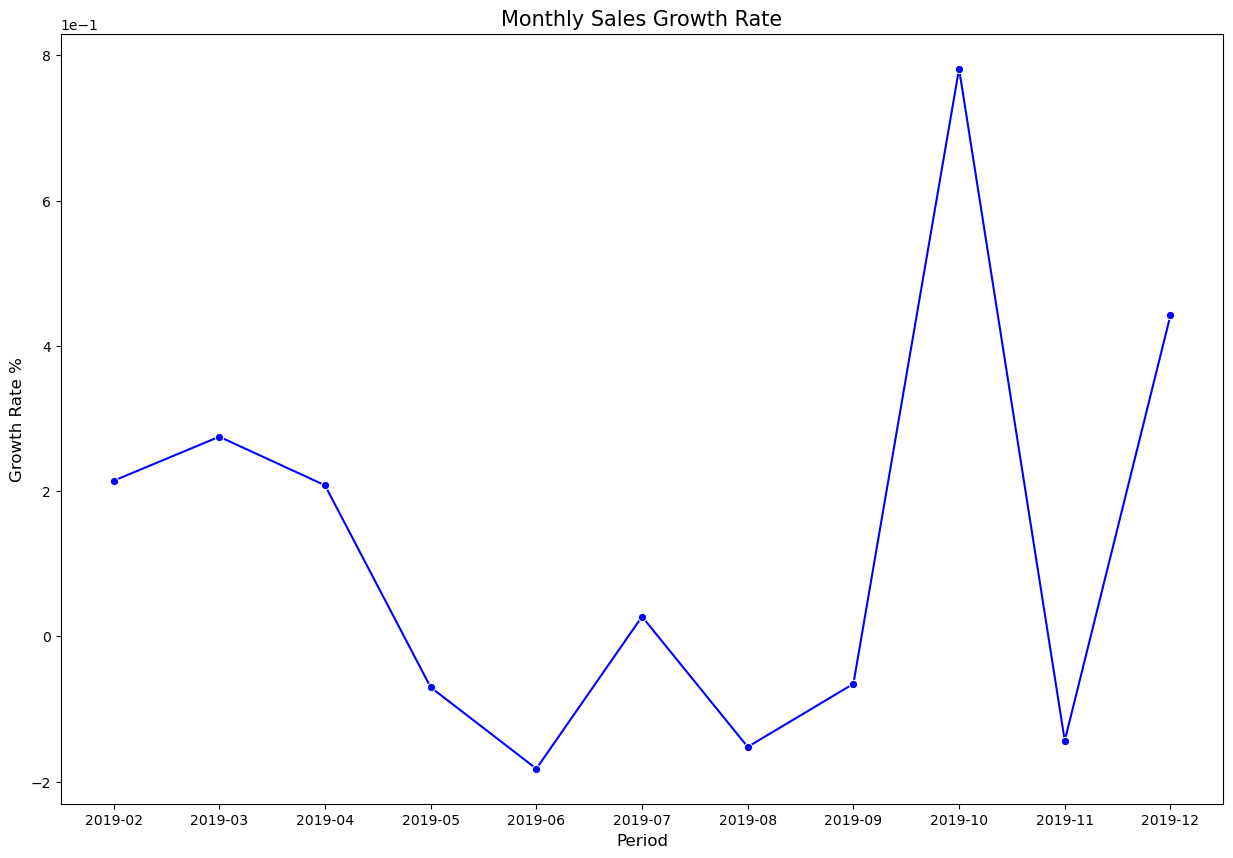

In [89]:
plt.figure(figsize = [15, 10])
sns.lineplot(data=monthly_sales, x = monthly_sales['period'].astype(str), y = 'pct_change', color = 'blue', marker = 'o')
plt.title('Monthly Sales Growth Rate', fontsize = 15)
plt.xlabel('Period', fontsize = 12)
plt.ylabel('Growth Rate %', fontsize = 12)
plt.show()

<a id='abc'></a>
## ABC Product Segmentation and Analysis

### 20. Which products generated 80% of gross profit?

ABC product classification is based on the Pareto principle, or 80/20 rule, which states that 80% of sales typically come from 20% of the products. It categorizes the products into three classes - A, B, and C - according to the specific criteria or metric such as sales/revenue or profit. It assigns class A to all products where the cumulative percentage is up to 80%, class B to those where the cumulative percentage contribution is between 80% and 95%, and assigns C to the rest. The result of ABC analysis is the grouping of the products in accordance with their degree of influence on the company's success, in this case, profit. Managing the inventory on the most important 20% of products can lead to better efficiency and profits. 

In [90]:
# Prepare data for abc analysis

df_products = sales.groupby(['product']).agg(
                                    num_skus=('product_code', 'nunique'),
                                    quantity=('quantity', 'sum'),
                                    sales=('sales', 'sum'),
                                    profit=('gross_profit', 'sum')).reset_index().sort_values(by='profit', ascending=False)
                        
df_products['profit_cumsum'] = df_products['profit'].cumsum()
df_products['total_profit'] = df_products['profit'].sum()
df_products['profit_running_pct'] = (df_products['profit_cumsum'] / df_products['total_profit'] * 100)
df_products

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct
13,Macbook Pro Laptop,4723,4727,8035900.00,5384053.00,5384053.00,21433200.13,25.120155
18,iPhone,6840,6847,4792900.00,3211243.00,8595296.00,21433200.13,40.102719
14,ThinkPad Laptop,4126,4128,4127958.72,2765718.74,11361014.74,21433200.13,53.006619
9,Google Phone,5524,5531,3318600.00,2223462.00,13584476.74,21433200.13,63.380534
1,27in 4K Gaming Monitor,6229,6243,2434707.57,1631233.61,15215710.35,21433200.13,70.991314
3,34in Ultrawide Monitor,6181,6199,2355558.01,1578203.59,16793913.94,21433200.13,78.354673
8,Flatscreen TV,4799,4818,1445400.00,968418.00,17762331.94,21433200.13,82.872981
6,Apple Airpods Headphones,15545,15657,2348550.00,821992.50,18584324.44,21433200.13,86.708118
7,Bose SoundSport Headphones,13322,13454,1345265.46,672698.70,19257023.14,21433200.13,89.846701
16,Vareebadd Phone,2064,2067,826800.00,553956.00,19810979.14,21433200.13,92.431270


In [91]:
# Create abc product segmentation

def segment_products(percentage):
    """ Assign an ABC segment to each product based on its ranked percentage profit contribution.
    
    Args:
        percentage: running percentage of profit contribution
    Return:
        ABC product segments
    
    """
    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'

In [92]:
# apply segment_products function on profit_running_pct

df_products['abc_segment_profit'] = df_products['profit_running_pct'].apply(segment_products)
df_products['abc_rank'] = df_products['profit_running_pct'].rank().astype(int)
df_products

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
13,Macbook Pro Laptop,4723,4727,8035900.00,5384053.00,5384053.00,21433200.13,25.120155,A,1
18,iPhone,6840,6847,4792900.00,3211243.00,8595296.00,21433200.13,40.102719,A,2
14,ThinkPad Laptop,4126,4128,4127958.72,2765718.74,11361014.74,21433200.13,53.006619,A,3
9,Google Phone,5524,5531,3318600.00,2223462.00,13584476.74,21433200.13,63.380534,A,4
1,27in 4K Gaming Monitor,6229,6243,2434707.57,1631233.61,15215710.35,21433200.13,70.991314,A,5
3,34in Ultrawide Monitor,6181,6199,2355558.01,1578203.59,16793913.94,21433200.13,78.354673,A,6
8,Flatscreen TV,4799,4818,1445400.00,968418.00,17762331.94,21433200.13,82.872981,B,7
6,Apple Airpods Headphones,15545,15657,2348550.00,821992.50,18584324.44,21433200.13,86.708118,B,8
7,Bose SoundSport Headphones,13322,13454,1345265.46,672698.70,19257023.14,21433200.13,89.846701,B,9
16,Vareebadd Phone,2064,2067,826800.00,553956.00,19810979.14,21433200.13,92.431270,B,10


In [93]:
df_products[df_products['abc_segment_profit'] == 'A']

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
13,Macbook Pro Laptop,4723,4727,8035900.00,5384053.00,5384053.00,21433200.13,25.120155,A,1
18,iPhone,6840,6847,4792900.00,3211243.00,8595296.00,21433200.13,40.102719,A,2
14,ThinkPad Laptop,4126,4128,4127958.72,2765718.74,11361014.74,21433200.13,53.006619,A,3
9,Google Phone,5524,5531,3318600.00,2223462.00,13584476.74,21433200.13,63.380534,A,4
1,27in 4K Gaming Monitor,6229,6243,2434707.57,1631233.61,15215710.35,21433200.13,70.991314,A,5
3,34in Ultrawide Monitor,6181,6199,2355558.01,1578203.59,16793913.94,21433200.13,78.354673,A,6


- The following products generated 78.35% of profit:
1. Macbook Pro Laptop
2. iPhone
3. ThinkPad Laptop
4. Google Phone
5. 27in 4K Gaming Monitor
6. 34in Ultrawide Monitor

It is important to maintain a sufficient supply of these products and make sure they are the most recent models.

In [94]:
df_products[df_products['abc_segment_profit'] == 'B']

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
8,Flatscreen TV,4799,4818,1445400.00,968418.00,17762331.94,21433200.13,82.872981,B,7
6,Apple Airpods Headphones,15545,15657,2348550.00,821992.50,18584324.44,21433200.13,86.708118,B,8
7,Bose SoundSport Headphones,13322,13454,1345265.46,672698.70,19257023.14,21433200.13,89.846701,B,9
16,Vareebadd Phone,2064,2067,826800.00,553956.00,19810979.14,21433200.13,92.431270,B,10
2,27in FHD Monitor,7504,7547,1131974.53,396217.07,20207196.21,21433200.13,94.279884,B,11


- The following products generated 15.93% of profit:
1. Flatscreen TV	
2. Apple Airpods Headphones
3. Bose SoundSport Headphones
4. Vareebadd Phone
5. 27in FHD Monitor	

In [95]:
df_products[df_products['abc_segment_profit'] == 'C']

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
11,LG Washing Machine,666,666,399600.00,267732.00,20474928.21,21433200.13,95.529030,C,12
10,LG Dryer,646,646,387600.00,259692.00,20734620.21,21433200.13,96.740664,C,13
12,Lightning Charging Cable,21653,23211,347004.45,173602.77,20908222.98,21433200.13,97.550636,C,14
0,20in Monitor,4099,4126,453818.74,158850.73,21067073.71,21433200.13,98.291779,C,15
15,USB-C Charging Cable,21899,23971,286453.45,143326.02,21210399.73,21433200.13,98.960489,C,16
17,Wired Headphones,18881,20553,246430.47,123301.40,21333701.13,21433200.13,99.535772,C,17
4,AA Batteries (4-pack),20577,27635,106118.40,53059.20,21386760.33,21433200.13,99.783328,C,18
5,AAA Batteries (4-pack),20638,31012,92725.88,46439.80,21433200.13,21433200.13,100.000000,C,19


- The following products generated 5.72% of profit:
1. LG Washing Machine
2. LG Dryer
3. Lightning Charging Cable
4. 20in Monitor
5. USB-C Charging Cable
6. Wired Headphones
7. AA Batteries (4-pack)	
8. AAA Batteries (4-pack)

In [96]:
# Analyze ABC segments

abc_segments = df_products.groupby(['abc_segment_profit']).agg(
                                            num_product = ('product', 'nunique'),
                                            skus = ('num_skus', 'sum'),
                                            quantity = ('quantity', 'sum'),
                                            sales = ('sales', 'sum'),
                                            profit = ('profit', 'sum')).reset_index()

abc_segments['skus_pct'] = round(abc_segments['skus'] / abc_segments['skus'].sum() * 100, 2)
abc_segments['avg_order_value'] = round(abc_segments['sales'] / abc_segments['quantity'], 2)
abc_segments['sales_pct'] = round(abc_segments['sales'] / abc_segments['sales'].sum() * 100, 2)
abc_segments['profit_pct'] = round(abc_segments['profit'] / abc_segments['profit'].sum() * 100, 2)
abc_segments.loc['total']= abc_segments.sum(numeric_only=True, axis=0)
abc_segments[['abc_segment_profit', 'num_product', 'skus', 'skus_pct', 'quantity', 'sales', 'sales_pct', 
              'profit', 'profit_pct', 'avg_order_value']]

,abc_segment_profit,num_product,skus,skus_pct,quantity,sales,sales_pct,profit,profit_pct,avg_order_value
0,A,6.0,33623.0,18.09,33675.0,25065624.30,72.69,16793913.94,78.35,744.34
1,B,5.0,43234.0,23.25,43543.0,7097989.99,20.58,3413282.27,15.93,163.01
2,C,8.0,109059.0,58.66,131820.0,2319751.39,6.73,1226003.92,5.72,17.60
total,NaN,19.0,185916.0,100.00,209038.0,34483365.68,100.00,21433200.13,100.00,924.95


- 18% of product SKUs generated 72% of sales and 78% of profit (segment A).
- 82% of product SKUs generated 28% of sales and 22% of profit (segment B and C).

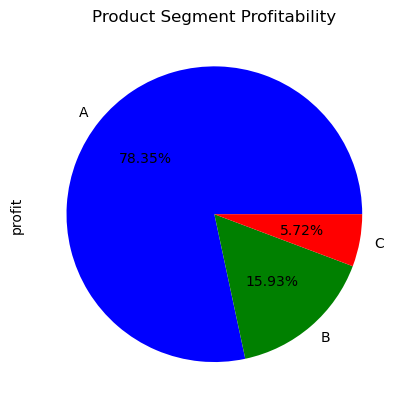

In [97]:
df_products.groupby(['abc_segment_profit'])['profit'].sum().plot(kind='pie', y = 'profit', autopct='%1.2f%%',
                                                                 colors= ['blue', 'green', 'red'],
                                                                 title = 'Product Segment Profitability')
plt.show();

In [98]:
# Merge sales and df_products

sales_abc = sales.merge(df_products, on = 'product', how = 'left')

cols = ['order_date', 'order_id', 'product', 'product_code', 'category', 
        'quantity_x', 'price', 'cost', 'sales_x', 'gross_profit', 'gross_margin', 
        'date', 'period', 'dow', 'hour', 'city', 'state', 'abc_segment_profit']

sales_abc = sales_abc[cols]
                                
sales_abc.rename(columns = {'quantity_x': 'quantity',
                           'sales_x': 'sales'}, inplace = True)
sales_abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185916 entries, 0 to 185915
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_date          185916 non-null  datetime64[ns]
 1   order_id            185916 non-null  object        
 2   product             185916 non-null  object        
 3   product_code        185916 non-null  object        
 4   category            185916 non-null  object        
 5   quantity            185916 non-null  int64         
 6   price               185916 non-null  float64       
 7   cost                185916 non-null  float64       
 8   sales               185916 non-null  float64       
 9   gross_profit        185916 non-null  float64       
 10  gross_margin        185916 non-null  float64       
 11  date                185916 non-null  object        
 12  period              185916 non-null  period[M]     
 13  dow                 185916 no

In [99]:
sales_abc.groupby(['abc_segment_profit']).agg(
                                            num_orders = ('order_id', 'nunique'),
                                            num_skus = ('product_code', 'nunique'),
                                            units_sold = ('quantity', 'sum'),
                                            avg_price = ('price', 'mean'),
                                            avg_cost = ('cost', 'mean'),
                                            avg_sales = ('sales', 'mean'),
                                            avg_profit = ('gross_profit', 'mean'),
                                            avg_margin = ('gross_margin', 'mean'))

,num_orders,num_skus,units_sold,avg_price,avg_cost,avg_sales,avg_profit,avg_margin
abc_segment_profit,,,,,,,,
A,33493,33623,33675,744.592233,245.715437,745.490417,499.476963,0.670000
B,42938,43234,43543,163.173469,84.674356,164.176111,78.949028,0.447018
C,107668,109059,131820,20.086017,9.436028,21.270609,11.241657,0.496407


- Products in segment A have an average profit of ``$499``, products in segment C has an average profit of ``$11``. To match a product's profit in segment A, a customer needs to purchase about 45 units from segment C.

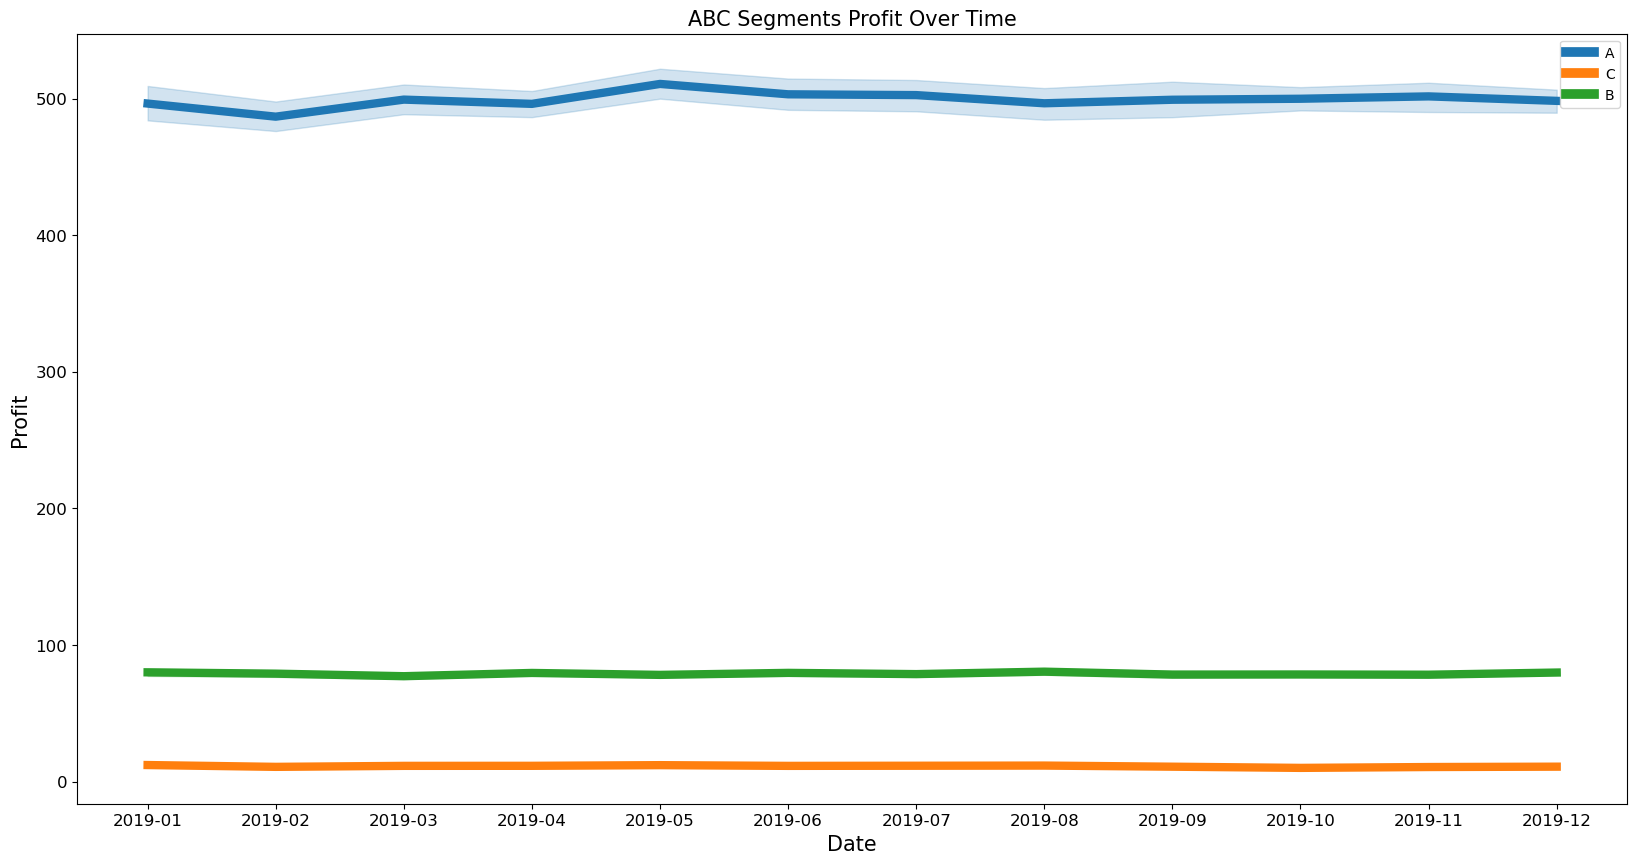

In [100]:
fig = plt.figure(figsize = [20, 10])

ax = sns.lineplot(data=sales_abc, x = sales_abc['period'].astype(str), y = 'gross_profit', hue = 'abc_segment_profit', linewidth = 6)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Profit', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('ABC Segments Profit Over Time', size = 15)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(7)

plt.show()

- Segment A's profitability has consistently outperformed Segment B's and C's profitability.

##### END